In [114]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [9]:
df.shape

(571, 43)

In [10]:
# this data set contains 571 rows and 43 columns. out of this 43 columns CGPA is my label, there is one column named Seat No. i dont consider it as feature 
# and remaining 41 columns are my features
# I need to predict CGPA score based on all the features.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [14]:
# through .info() i observed that all the feature columns has object data type and label column has float data type
# also Except Seat No.,PH-121,HS-101,CS-105,CGPA these columns all other remaining feature columns has null values 
# PH-121,HS-101,CS-105,CGPA these columns don't have any null values present

In [15]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [16]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [17]:
# through .nunique() i observed that all the feature columns has Categorical data
# label column has Continuous data.
# as there are more than two features present and label has continuous data, i can term it as Multiple Linear Regression problem

In [18]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [19]:
# here also i can see there are null values are present in all columns except PH-121,HS-101,CGPA 

In [20]:
df.sample(30)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
28   CS-97029     B+      B     A-        B+     B-      A      B     D+   
50   CS-97051     C+      D      C         D     D+      B     A-     C-   
406  CS-97407     B-     B-     B+         B     B+     B+     B+      A   
451  CS-97452     C+      D     B+         C     D+      C     D+      B   
295  CS-97296     D+      C     B-        B-     B+     C+     B+     B-   
280  CS-97281      A     A-     A-        A+     A-      A     C+      A   
144  CS-97145     A+     A-      A        A+      A      A      A     A-   
380  CS-97381     C+     B+     A-        B+     A-     B-     B+     A+   
363  CS-97364      D     C+     B-        C+     A-      C      B     B+   
468  CS-97469     C-      D      B         C      D      B      C     A-   
486  CS-97487      B      B      A        B+     B-     A+      B     B+   
272  CS-97273     B-     B-     A-         B     B+     A-     B-     C-   
242  CS-97243     A-     B-     A-         A     B-     B+     A-      B   
251  CS-97252     B+     A-     A-         B     B-      A     B-      C   
419  CS-97420      A      A     B+         A      A     B-      A      A   
79   CS-97080      A     B-      A        B-      A     A-      A      A   
499  CS-97500     A+     A+     A+        A+     A+     A+     B+     A+   
257  CS-97258     B-      B     B+         B     D+     A-     C-     B+   
516  CS-97517      B      D     A-         D     B+     D+     B+     C-   
6    CS-97007     B-     C-     A-         D     A-      B      A     B+   
378  CS-97379      D      C      A         C     B-     B-     B-     C+   
340  CS-97341      D      D      B        C+      D     B-      B     B-   
483  CS-97484     A-     B+      A        A+     A-     A+     A-      A   
423  CS-97424      D     D+      D         D     C-      C     C+     B-   
449  CS-97450      A     A-      A         A      A     A+      B     A-   
490  CS-97491     C+      D      A        D+     B-     A-      B      A   
302  CS-97303      B     A-      A        B+     A+     B+     A-      A   
241  CS-97242     A-      C      A        B-     B-      A      B     A-   
74   CS-97075     A-     B-      B        B-     D+     A-      C     A-   
401  CS-97402      D      D     B-         D     B-     C-      B      B   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
28      A-  ...     C+     B+      B     C+     A-      A     B-     B+   
50       C  ...     B-     C-     C-      C     B+      A     B-     B-   
406     B-  ...     A+     B-     A-      B    NaN      A      B     A-   
451     C+  ...     B+     B-     A-     C-      C     C+      B      C   
295     C-  ...      A     B+     C-     B+      B     A-     B-      A   
280     A-  ...     A-     A-      B     C+     B+     A-      A     B+   
144      A  ...     A-      A     A+     A-     A-      A      A     A-   
380     B+  ...     A+     B+     A-      B    NaN      A     A-      A   
363      D  ...     A+     C+     A-     B-    NaN      A     C+      A   
468      C  ...      C     C+      A     C-     D+      D     B-     C-   
486      A  ...      B      C     A+     B-      C      B      B     C+   
272     B-  ...     C+      B     B+     B-     A-     A-     B+      B   
242     B+  ...     C-     C-     B-      C     B+     A-     B-     B-   
251      B  ...      C      C     A-     C-      A     A-     C+     B-   
419     B+  ...     A+     A-      A     B+    NaN      A     A-      A   
79       B  ...     A-     A-      B      B     A-      A     A-     B+   
499      A  ...     A+     A+      A      A     A+     A-      A     A+   
257      C  ...     D+     D+     C-     C-      B     A-      C     D+   
516     C-  ...     D+      F      A      C      F     C-      B      F   
6       A-  ...     B-      C     B+     B-      A     A-     B+     B+   
378     D+  ...      A      C     B-     C+    NaN     B+      B     A-  

In [ ]:
# in this sample i can see there are few null values oresent here and there.

In [21]:
df.isnull()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0       False   False   False   False      False   False   False   False   
1       False   False   False   False      False   False   False   False   
2       False   False   False   False      False   False   False   False   
3       False   False   False   False      False   False   False   False   
4       False   False   False   False      False   False   False   False   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566     False   False   False   False      False   False   False   False   
567     False   False   False   False      False   False   False   False   
568     False   False   False   False      False   False   False   False   
569     False   False   False   False      False   False   False   False   
570     False   False   False   False      False   False   False   False   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0     False   False  ...   False   False   False   False   False   False   
1     False   False  ...   False   False   False   False   False   False   
2     False   False  ...   False   False   False   False   False   False   
3     False   False  ...   False   False   False   False   False   False   
4     False   False  ...   False   False   False   False   False   False   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566   False   False  ...   False   False   False   False   False   False   
567   False   False  ...   False   False   False   False   False   False   
568   False   False  ...   False   False   False   False   False   False   
569   False   False  ...   False   False   False   False   False   False   
570   False   False  ...   False   False   False   False   False   False   

     CS-419  CS-423  CS-412   CGPA  
0     False   False   False  False  
1     False   False   False  False  
2     False   False   False  False  
3     False   False   False  False  
4     False   False   False  False  
..      ...     ...     ...    ...  
566   False   False   False  False  
567   False   False   False  False  
568   False   False   False  False  
569   False   False   False  False  
570   False   False   False  False  

[571 rows x 43 columns]

In [23]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [26]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

## here i am Setting seat no. column as an index

In [28]:
df.set_index('Seat No.',inplace=True)

In [29]:
df

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
...         ...    ...    ...       ...    ...    ...    ...    ...    ...   
CS-97567      B      A      A        A-     A+      A     A-     A-     A+   
CS-97568     A+      A      A         A      A      A      A     A-      A   
CS-97569      B      A     A-        B+      A      A      A      A      A   
CS-97570      A     B+      D         A      D     D+     B-     C-     B-   
CS-97571      C      D      D         C      C     D+      B     C+      C   

         ME-107  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
Seat No.         ...                                                           
CS-97001     C-  ...     C-     C-     C-     C-     A-      A     C-      B   
CS-97002      D  ...     D+      D      C      D     A-     B-      C      C   
CS-97003     A-  ...      B      B      A      C      A      A      A     A-   
CS-97004     C+  ...     D+      C     D+     C-     B-      B     C+     C+   
CS-97005     A-  ...     B-     B+     B+     B-     A-      A     A-     A-   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
CS-97567     B+  ...     A-     A-      A      A      A     B+     B+      B   
CS-97568      A  ...     B+     B+      A      A     A-      B     A-      C   
CS-97569      B  ...     A-      B      A     B+      A      C     B+     A-   
CS-97570     C-  ...      D      B      B     C-      D      C      B     B-   
CS-97571     D+  ...     C+      C     B-      D      F     C-     B+      D   

         CS-412   CGPA  
Seat No.                
CS-97001     A-  2.205  
CS-97002      B  2.008  
CS-97003      A  3.608  
CS-97004     C+  1.906  
CS-97005      A  3.448  
...         ...    ...  
CS-97567      A  3.798  
CS-97568     A-  3.772  
CS-97569     A-  3.470  
CS-97570      C  2.193  
CS-97571     C-  1.753  

[571 rows x 42 columns]

## Let's fill all Missing values through mode as we have object data type

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [33]:
def fill_mode(column):
    return column.fillna(column.mode()[0])

df[categorical_cols] = df[categorical_cols].apply(fill_mode)


In [34]:
df.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [ ]:
# now there is no null value present 

In [35]:
# let's Separate features and label 
df_feature = df.drop ('CGPA',axis =1)
df_feature

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
...         ...    ...    ...       ...    ...    ...    ...    ...    ...   
CS-97567      B      A      A        A-     A+      A     A-     A-     A+   
CS-97568     A+      A      A         A      A      A      A     A-      A   
CS-97569      B      A     A-        B+      A      A      A      A      A   
CS-97570      A     B+      D         A      D     D+     B-     C-     B-   
CS-97571      C      D      D         C      C     D+      B     C+      C   

         ME-107  ... CS-306 CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419  \
Seat No.         ...                                                           
CS-97001     C-  ...      C     C-     C-     C-     C-     A-      A     C-   
CS-97002      D  ...      D     D+      D      C      D     A-     B-      C   
CS-97003     A-  ...     A-      B      B      A      C      A      A      A   
CS-97004     C+  ...     C-     D+      C     D+     C-     B-      B     C+   
CS-97005     A-  ...     A-     B-     B+     B+     B-     A-      A     A-   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
CS-97567     B+  ...     B+     A-     A-      A      A      A     B+     B+   
CS-97568      A  ...     A-     B+     B+      A      A     A-      B     A-   
CS-97569      B  ...     B+     A-      B      A     B+      A      C     B+   
CS-97570     C-  ...     B+      D      B      B     C-      D      C      B   
CS-97571     D+  ...     D+     C+      C     B-      D      F     C-     B+   

         CS-423 CS-412  
Seat No.                
CS-97001      B     A-  
CS-97002      C      B  
CS-97003     A-      A  
CS-97004     C+     C+  
CS-97005     A-      A  
...         ...    ...  
CS-97567      B      A  
CS-97568      C     A-  
CS-97569     A-     A-  
CS-97570     B-      C  
CS-97571      D     C-  

[571 rows x 41 columns]

In [39]:
df_feature.dtypes

PH-121       object
HS-101       object
CY-105       object
HS-105/12    object
MT-111       object
CS-105       object
CS-106       object
EL-102       object
EE-119       object
ME-107       object
CS-107       object
HS-205/20    object
MT-222       object
EE-222       object
MT-224       object
CS-210       object
CS-211       object
CS-203       object
CS-214       object
EE-217       object
CS-212       object
CS-215       object
MT-331       object
EF-303       object
HS-304       object
CS-301       object
CS-302       object
TC-383       object
MT-442       object
EL-332       object
CS-318       object
CS-306       object
CS-312       object
CS-317       object
CS-403       object
CS-421       object
CS-406       object
CS-414       object
CS-419       object
CS-423       object
CS-412       object
dtype: object

In [42]:
# here i converted all the features to Integer  data type from object data type

In [43]:
df1 = df.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode each object column
for col in df_feature:
    df1[col] = le.fit_transform(df1[col])

df1

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
Seat No.                                                                      
CS-97001       5      10       8          6       8      10       9       8   
CS-97002       0       9      10          9       5       6       9       0   
CS-97003       0       3       0          5       4       0       5       4   
CS-97004       9       7      10          9       9       2      10       8   
CS-97005       2       2       2          4       0       0       2       4   
...          ...     ...     ...        ...     ...     ...     ...     ...   
CS-97567       3       0       0          2       1       0       2       2   
CS-97568       1       0       0          0       0       0       0       2   
CS-97569       3       0       2          4       0       0       0       0   
CS-97570       0       4       9          0       9      10       5       8   
CS-97571       6       9       9          6       6      10       3       7   

          EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
Seat No.                  ...                                                   
CS-97001       5       8  ...       8       8       8       8       2       0   
CS-97002      10       9  ...      10       9       6       9       2       5   
CS-97003       2       2  ...       3       3       0       6       0       0   
CS-97004       9       7  ...      10       6      10       8       5       3   
CS-97005       0       2  ...       5       4       4       5       2       0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
CS-97567       1       4  ...       2       2       0       0       0       4   
CS-97568       0       0  ...       4       4       0       0       2       3   
CS-97569       0       3  ...       2       3       0       4       0       6   
CS-97570       5       8  ...       9       3       3       8       9       6   
CS-97571       6      10  ...       7       6       5       9      11       8   

          CS-419  CS-423  CS-412   CGPA  
Seat No.                                 
CS-97001       8       3       2  2.205  
CS-97002       6       6       3  2.008  
CS-97003       0       2       0  3.608  
CS-97004       7       7       7  1.906  
CS-97005       2       2       0  3.448  
...          ...     ...     ...    ...  
CS-97567       4       3       0  3.798  
CS-97568       2       6       2  3.772  
CS-97569       4       2       2  3.470  
CS-97570       3       5       6  2.193  
CS-97571       4       9       8  1.753  

[571 rows x 42 columns]

In [46]:
df1.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    2.898424    4.241681    3.896673    2.838879   
std      3.046895    2.785317    2.964737    3.200507    2.988546    2.696709   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    4.500000    7.000000    6.000000    4.000000   
max     12.000000   11.000000   12.000000   12.000000   12.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     4.122592    3.959720    3.886165    4.779335  ...    4.071804   
std      2.727192    3.031436    2.657528    3.146202  ...    3.362345   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    5.000000  ...    3.000000   
75%      5.000000    6.000000    6.000000    8.000000  ...    7.000000   
max     12.000000   12.000000   11.000000   12.000000  ...   13.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.835377    3.432574    5.385289    2.984238    2.397548    3.856392   
std      2.740382    2.980685    2.729063    2.468346    2.499388    2.382769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.000000    3.000000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.000000    4.000000    4.000000    5.000000   
max     11.000000   10.000000   12.000000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     3.966725    3.049037    2.954888  
std      2.795475    2.332316    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      4.000000    2.000000    3.029000  
75%      6.000000    4.000000    3.451000  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

In [ ]:
# there is 571 count for each column so there is no null values present in any of the column. i have treated null values already 

In [48]:
df1.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

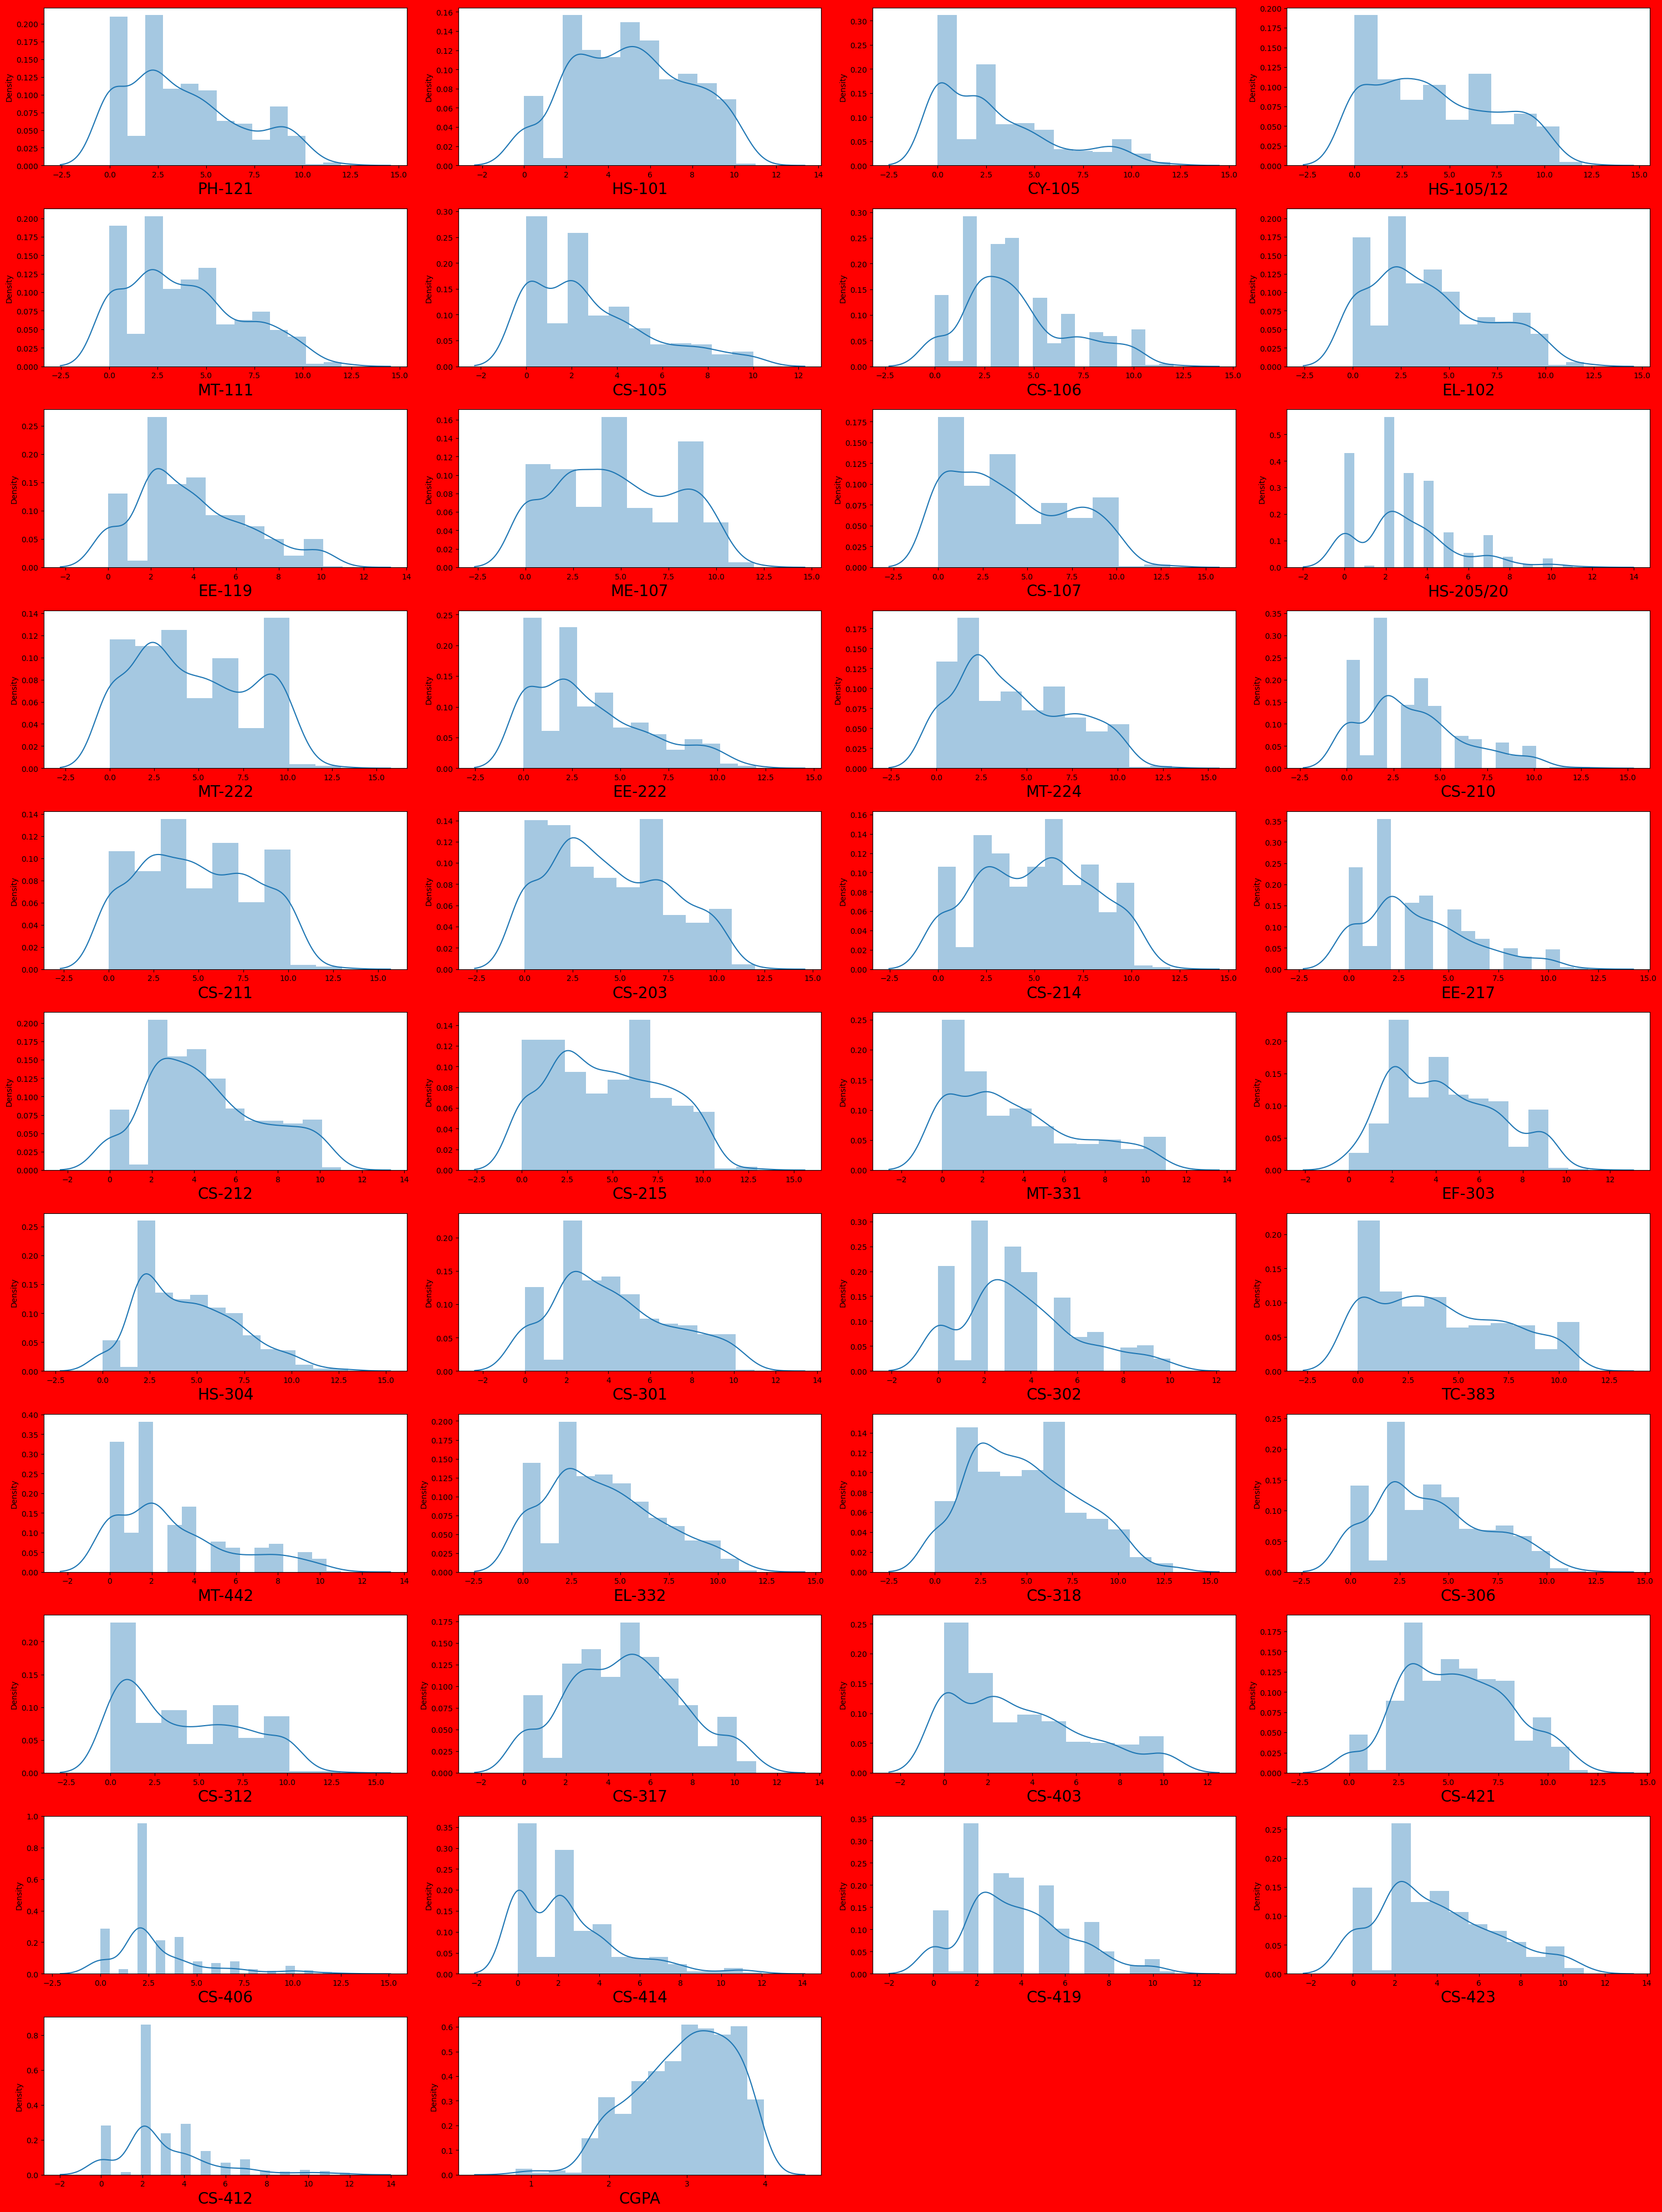

In [58]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(30, 40), facecolor='red')

plotnumber = 1
for column in df1.columns: 
    if plotnumber <= 42:
        ax = plt.subplot(11, 4, plotnumber) 
        sns.distplot(df1[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# data distribution looks pretty good among all the columns
# still i can see right skewness in cs_412,cs-414,cs-406,cy-105,cs-105,cs-106,HS-205/20,EE-222,CS-210,EE-217,MT-331,MT-442,CS-403 in these columns

In [59]:
# lets apply boxcox method to remove skewness from above mentioned columns as there skewness is beyond acceptable range

df2 = df1.copy()
column_to_transform = ['CS-412','CS-414','CS-406','CS-403','MT-442','CS-302','MT-331','EE-217','CS-210','EE-222','HS-205/20','CS-106','CS-105','CY-105']
from scipy.stats import boxcox

for column in column_to_transform:
    df2[column], _ = boxcox(df2[column] + 1)
    
df2.skew()

PH-121       0.549104
HS-101       0.053303
CY-105      -0.013505
HS-105/12    0.324183
MT-111       0.484906
CS-105      -0.036751
CS-106      -0.039215
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20   -0.056730
MT-222       0.193993
EE-222      -0.069595
MT-224       0.430480
CS-210      -0.073924
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217      -0.070137
CS-212       0.414872
CS-215       0.163631
MT-331      -0.089948
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302      -0.069703
TC-383       0.331652
MT-442      -0.045893
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403      -0.099369
CS-421       0.179508
CS-406       0.004401
CS-414      -0.005778
CS-419       0.506748
CS-423       0.526550
CS-412       0.004089
CGPA        -0.497203
dtype: float64

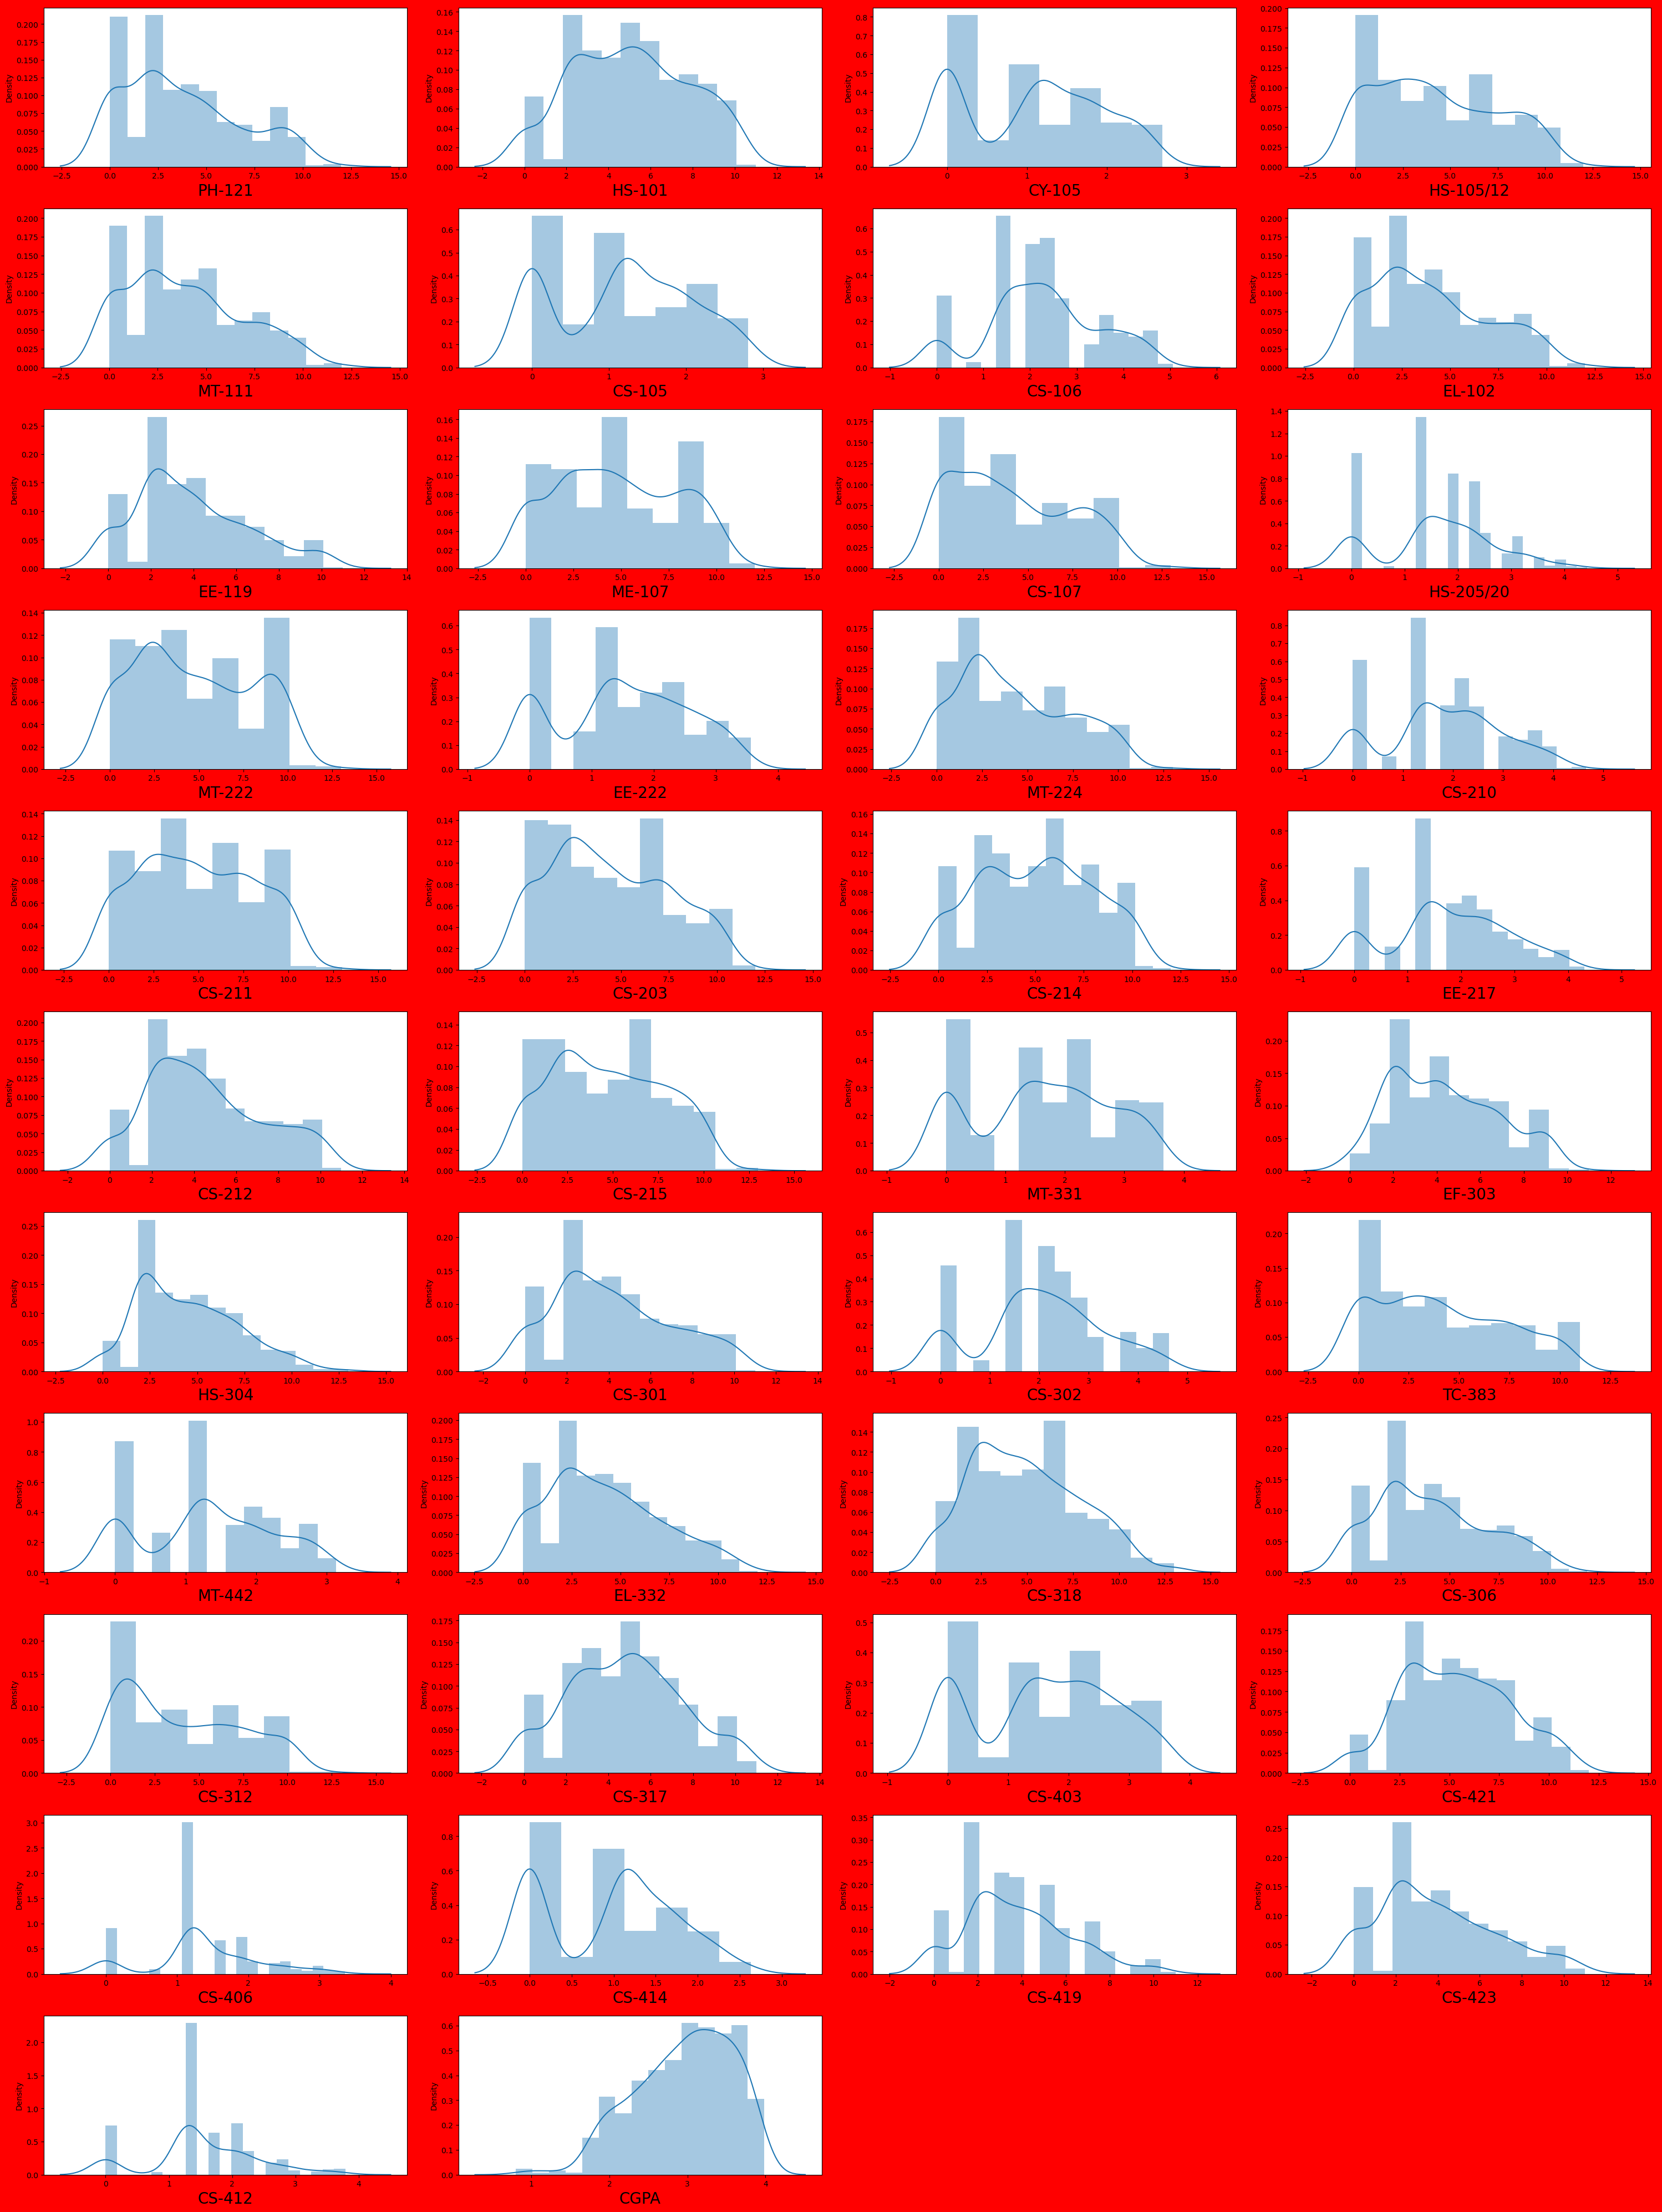

In [60]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(30, 40), facecolor='red')

plotnumber = 1
for column in df2.columns: 
    if plotnumber <= 42:
        ax = plt.subplot(11, 4, plotnumber) 
        sns.distplot(df2[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# here data distribution is pretty good than before also with .skew() method we can see there is no skewness present beyond acceptable range

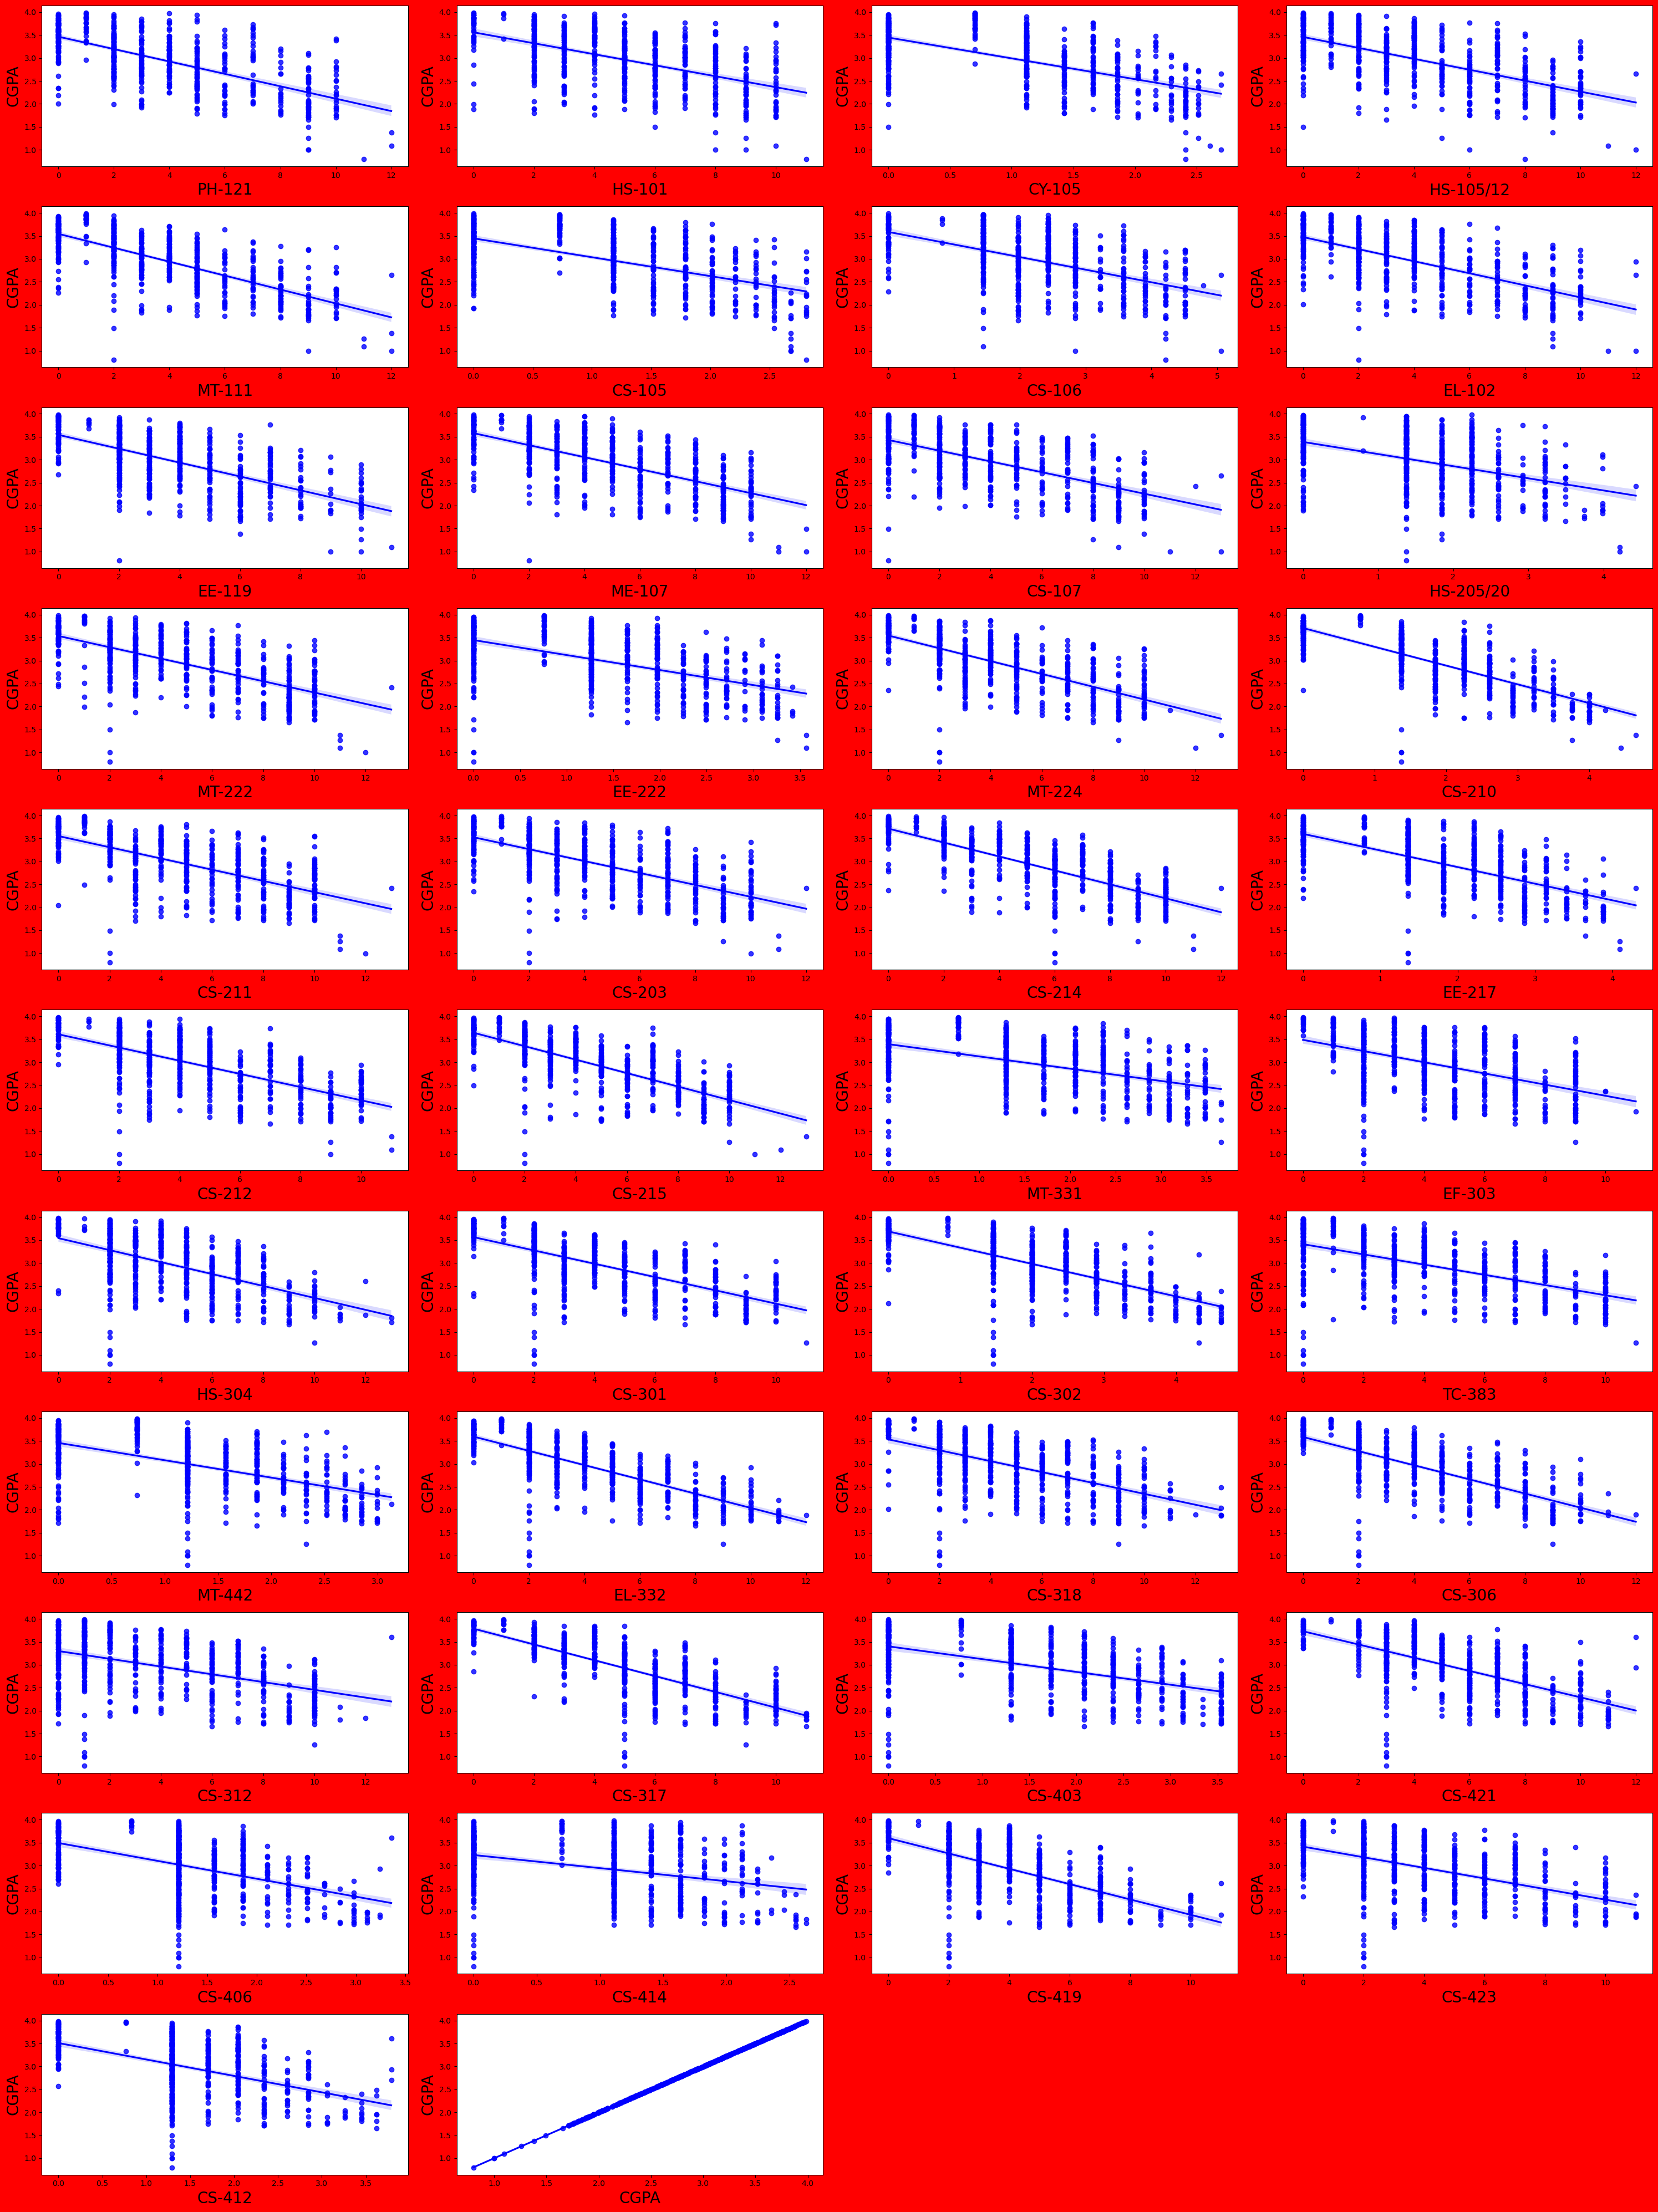

In [66]:

plt.figure(figsize=(30, 40), facecolor='red')

plotnumber = 1
for column in df2: 
    if plotnumber <= 42:
        ax = plt.subplot(11, 4, plotnumber) 
        sns.regplot(y='CGPA', x=column, data=df2, color='blue')  
        plt.ylabel("CGPA", fontsize=20)
        plt.xlabel(column,fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


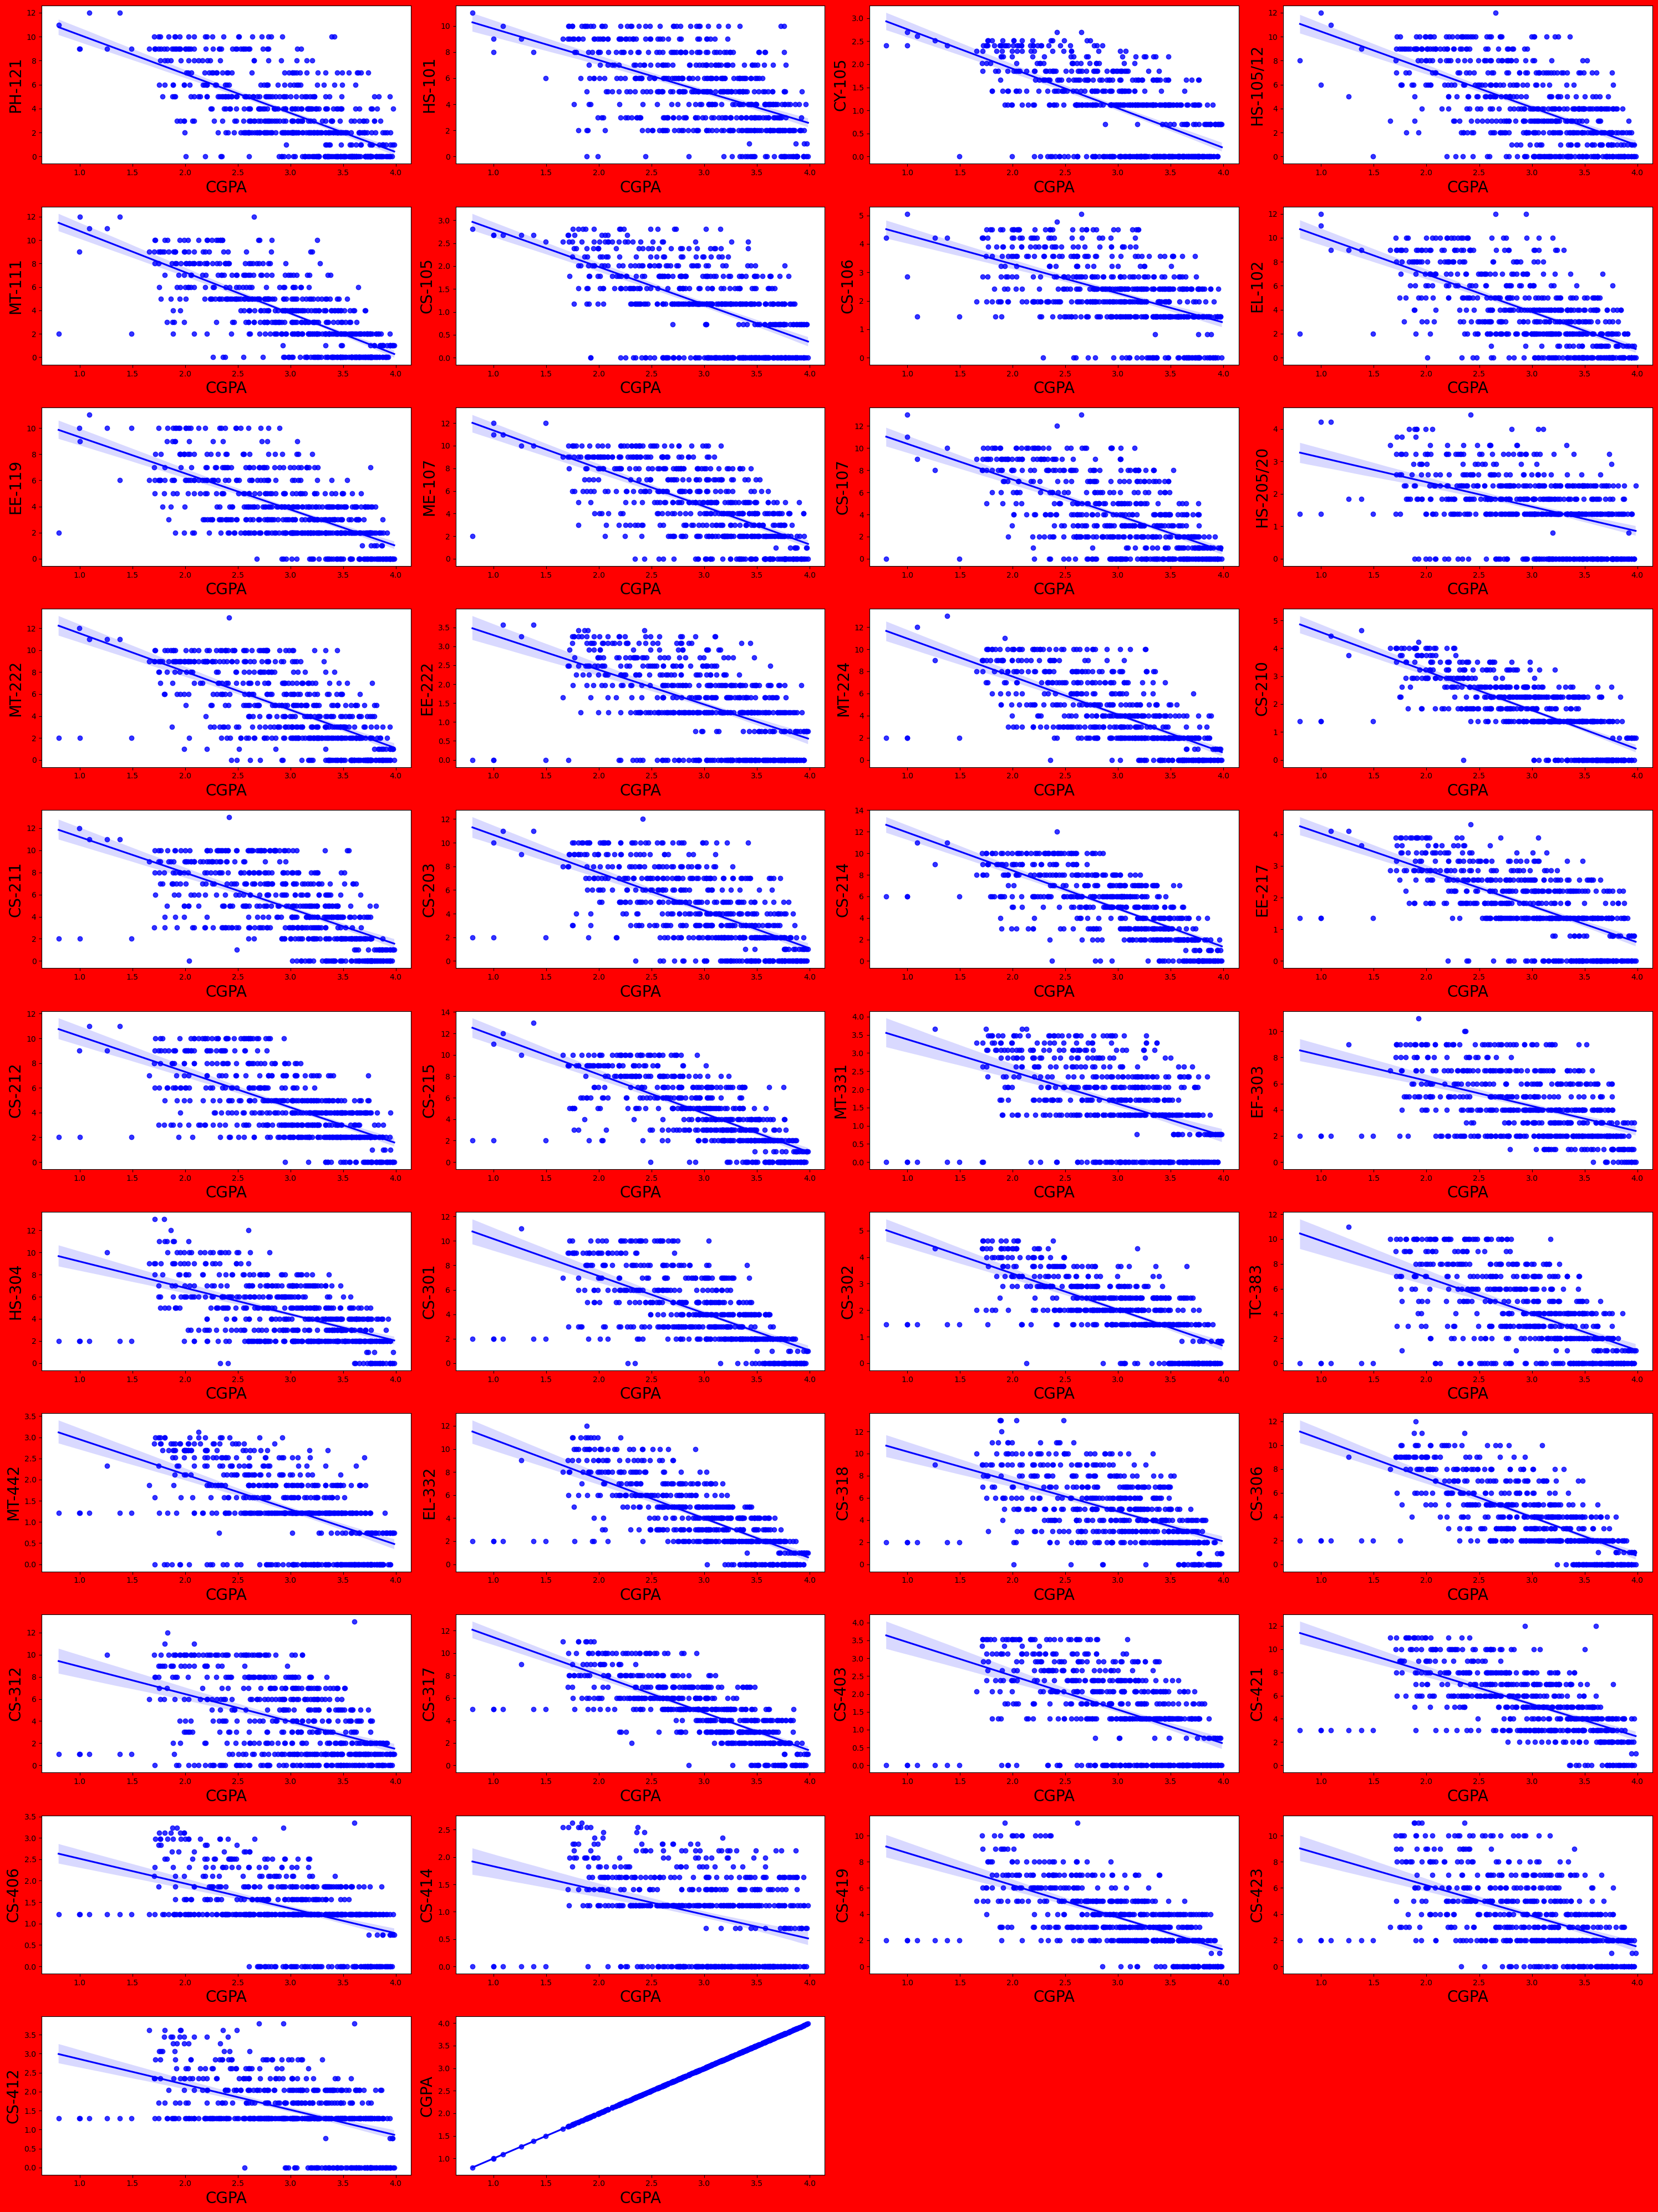

In [65]:

plt.figure(figsize=(30, 40), facecolor='red')

plotnumber = 1
for column in df2: 
    if plotnumber <= 42:
        ax = plt.subplot(11, 4, plotnumber) 
        sns.regplot(y= column, x='CGPA', data=df2, color='blue')  
        plt.ylabel(column, fontsize=20)
        plt.xlabel("CGPA",fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [67]:
# here i observed all the features have positive relationship with label

In [63]:
# let's Separate features and label 
df_feature = df2.drop ('CGPA',axis =1)


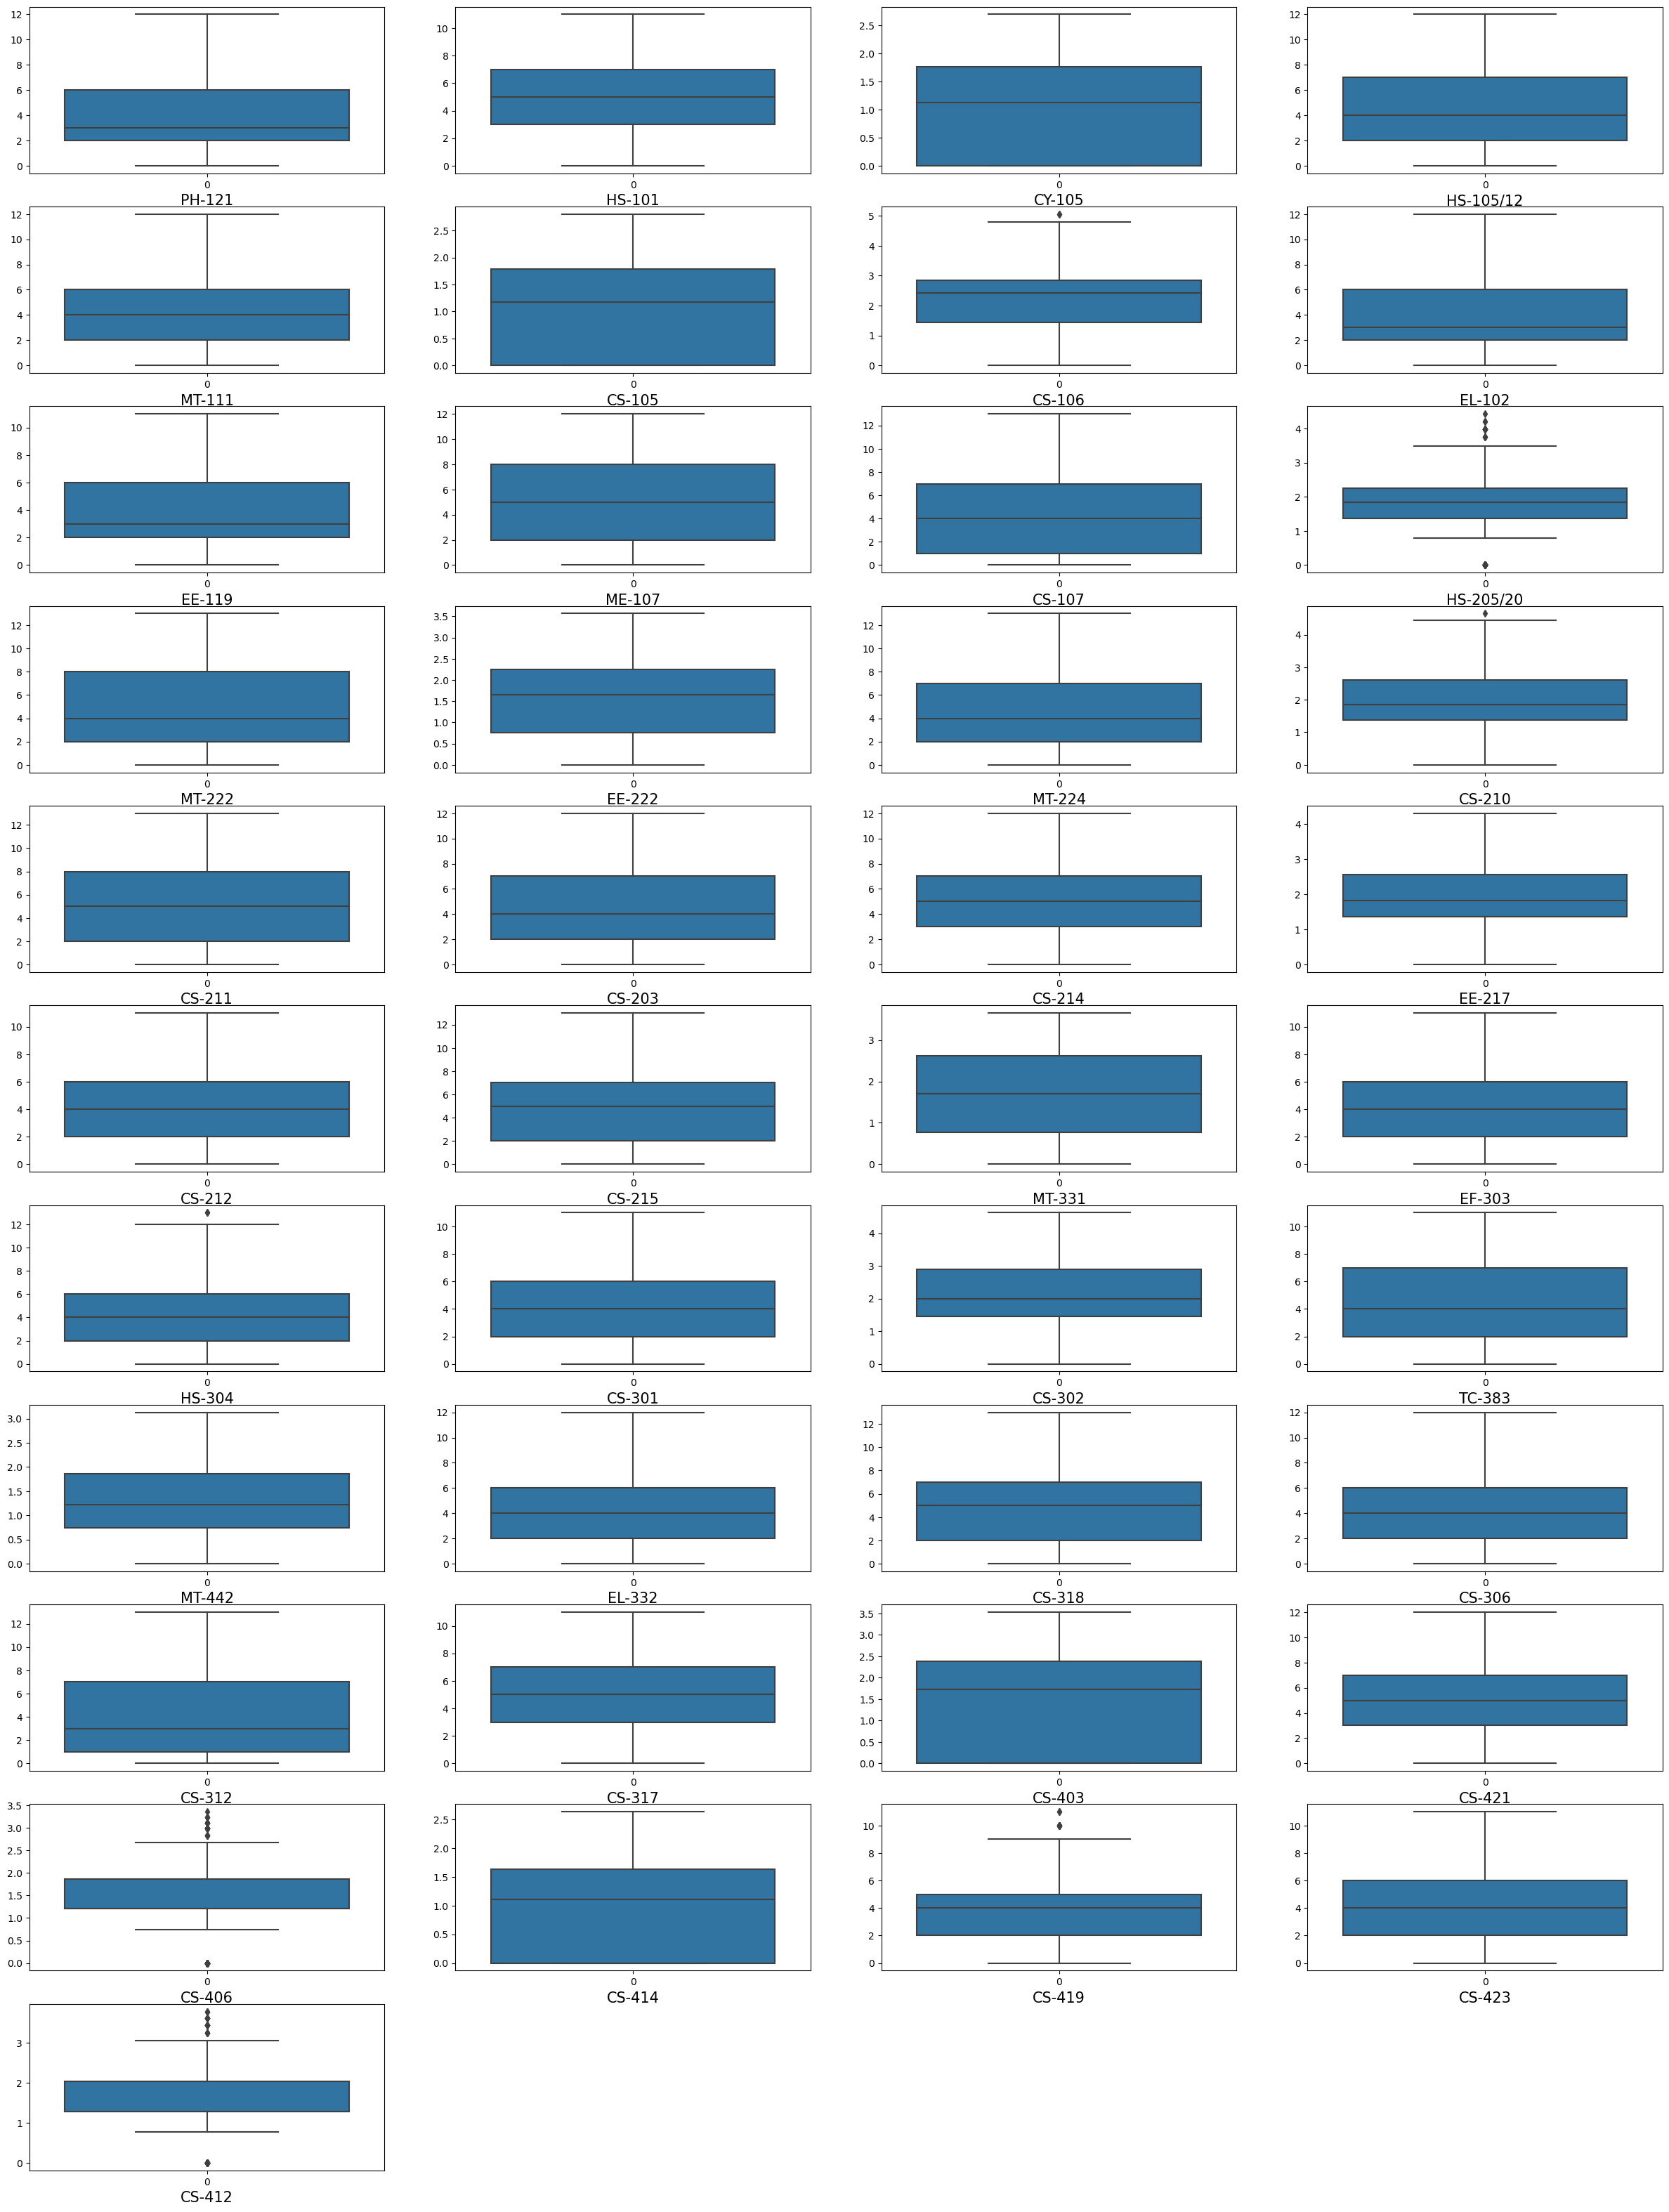

In [68]:
# lets plot boxplot to check outliers
plt.figure(figsize=(30,40))
graph = 1
for column in df_feature:
    if graph <=42:
        plt.subplot(11,4,graph)
        ax = sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [70]:
# i observed there are outliers present in cs-412,cs-419,cs-406,hs-304,cs-210, HS-205/20,cs-106 
# lets remove this outliers

In [71]:
df_feature.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [72]:
# using zscore method to treat outliers
from scipy.stats import zscore
features = df2[['CS-412','CS-419','CS-406','HS-304','CS-210', 'HS-205/20','CS-106']]
z = np.abs(zscore(features))
z

CS-412    CS-419    CS-406    HS-304    CS-210  HS-205/20  \
Seat No.                                                                
CS-97001  0.305331  1.740513  0.222957  0.934703  1.206670   0.579349   
CS-97002  0.180073  0.900418  0.222957  1.311089  1.880801   1.506182   
CS-97003  1.830580  1.619869  1.824320  1.700000  1.609354   0.251557   
CS-97004  1.528155  1.320466  0.958557  0.181931  0.948303   0.195790   
CS-97005  1.830580  0.779774  0.222957  0.947227  0.408300   1.561849   
...            ...       ...       ...       ...       ...        ...   
CS-97567  1.830580  0.060322  1.824320  0.947227  1.609354   1.561849   
CS-97568  0.305331  0.779774  0.222957  1.700000  1.609354   0.579349   
CS-97569  0.305331  0.060322  1.824320  0.181931  0.408300   0.918704   
CS-97570  1.247191  0.359726  1.926184  0.558317  0.666520   1.506182   
CS-97571  1.785076  0.060322  2.293125  2.440248  0.354671   1.506182   

            CS-106  
Seat No.            
CS-97001  1.587946  
CS-97002  1.587946  
CS-97003  0.444804  
CS-97004  1.834074  
CS-97005  0.719166  
...            ...  
CS-97567  0.719166  
CS-97568  1.927057  
CS-97569  1.927057  
CS-97570  0.444804  
CS-97571  0.282588  

[571 rows x 7 columns]

In [73]:
np.where(z>3)

(array([340, 352, 454, 563]), array([3, 3, 1, 1]))

In [75]:
z.iloc[563,1]

3.0006569858999947

In [76]:
df_zscore = df2[(z<3).all(axis=1)]

In [77]:
df_zscore.shape

(567, 42)

In [78]:
print('old df shape-',df2.shape[0])
print('df_zscore shape-',df_zscore.shape[0])

old df shape- 571
df_zscore shape- 567


In [79]:
print ('data loss percentage ',((df1.shape[0]-df_zscore.shape[0])/df1.shape[0])*100)

data loss percentage  0.7005253940455342


In [82]:
df_zscore

PH-121  HS-101    CY-105  HS-105/12  MT-111    CS-105    CS-106  \
Seat No.                                                                    
CS-97001       5      10  2.293189          6       8  2.805481  4.211212   
CS-97002       0       9  2.512488          9       5  2.208971  4.211212   
CS-97003       0       3  0.000000          5       4  0.000000  2.841650   
CS-97004       9       7  2.512488          9       9  1.179396  4.506090   
CS-97005       2       2  1.122263          4       0  0.000000  1.447135   
...          ...     ...       ...        ...     ...       ...       ...   
CS-97567       3       0  0.000000          2       1  0.000000  1.447135   
CS-97568       1       0  0.000000          0       0  0.000000  0.000000   
CS-97569       3       0  1.122263          4       0  0.000000  0.000000   
CS-97570       0       4  2.408118          0       9  2.805481  2.841650   
CS-97571       6       9  2.408118          6       6  2.805481  1.970185   

          EL-102  EE-119  ME-107  ...  CS-312  CS-317    CS-403  CS-421  \
Seat No.                          ...                                     
CS-97001       8       5       8  ...       8       8  3.129401       8   
CS-97002       0      10       9  ...      10       9  2.656610       9   
CS-97003       4       2       2  ...       3       3  0.000000       6   
CS-97004       8       9       7  ...      10       6  3.533815       8   
CS-97005       4       0       2  ...       5       4  2.077763       5   
...          ...     ...     ...  ...     ...     ...       ...     ...   
CS-97567       2       1       4  ...       2       2  0.000000       0   
CS-97568       2       0       0  ...       4       4  0.000000       0   
CS-97569       0       0       3  ...       2       3  0.000000       4   
CS-97570       8       5       8  ...       9       3  1.725363       8   
CS-97571       7       6      10  ...       7       6  2.384038       9   

            CS-406    CS-414  CS-419  CS-423    CS-412   CGPA  
Seat No.                                                       
CS-97001  1.211831  0.000000       8       3  1.291475  2.205  
CS-97002  1.211831  1.823245       6       6  1.702482  2.008  
CS-97003  0.000000  0.000000       0       2  0.000000  3.608  
CS-97004  2.105943  1.405093       7       7  2.843944  1.906  
CS-97005  1.211831  0.000000       2       2  0.000000  3.448  
...            ...       ...     ...     ...       ...    ...  
CS-97567  0.000000  1.634812       4       3  0.000000  3.798  
CS-97568  1.211831  1.405093       2       6  1.291475  3.772  
CS-97569  0.000000  1.983083       4       2  1.291475  3.470  
CS-97570  2.838194  1.983083       3       5  2.606044  2.193  
CS-97571  3.115877  2.244697       4       9  3.061487  1.753  

[567 rows x 42 columns]

In [80]:
# here data loss is very minimal so i will Stick to z score method to remove outliers

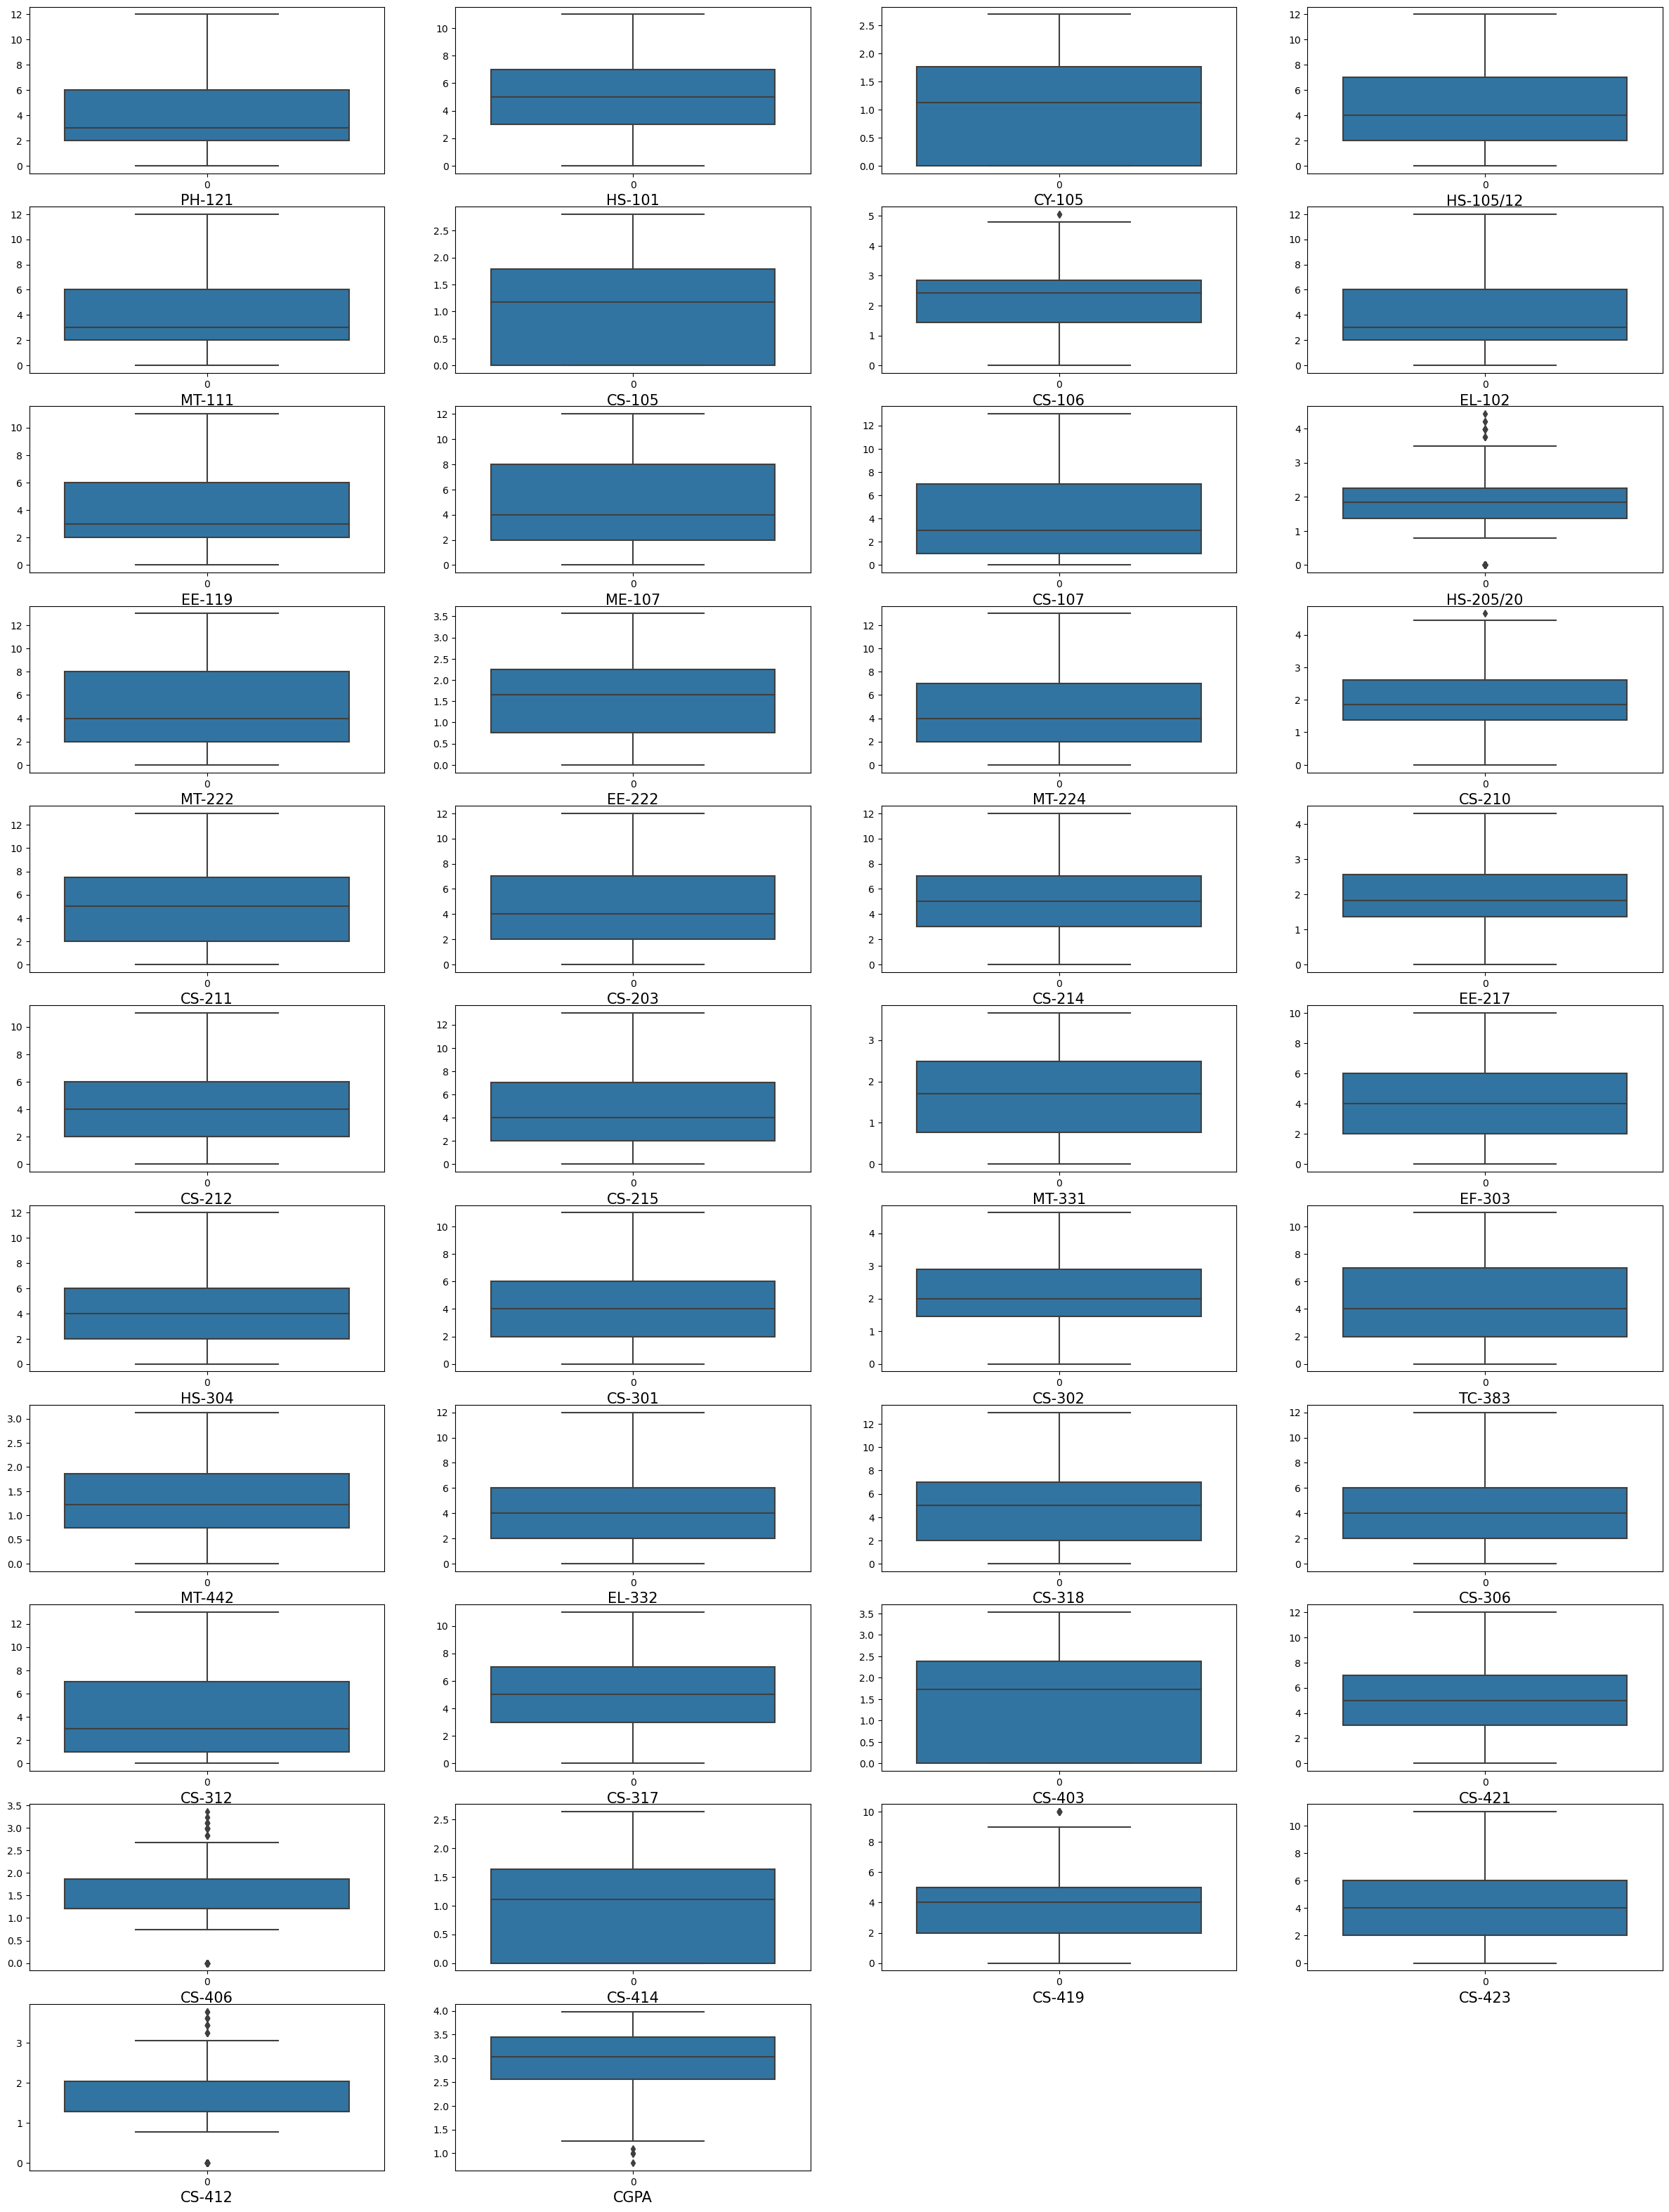

In [83]:
# lets plot boxplot to check outliers
plt.figure(figsize=(30,40))
graph = 1
for column in df_zscore:
    if graph <=42:
        plt.subplot(11,4,graph)
        ax = sns.boxplot(data=df_zscore[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [84]:
# there are still outliers are present i will check with IQR METHOD

In [85]:
#IQR METHOD
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3-Q1
df_iqr = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [87]:
print('old df shape-',df2.shape[0])
print('df_zscore shape-',df_zscore.shape[0])
print('df_iqr shape-',df_iqr.shape[0])

old df shape- 571
df_zscore shape- 567
df_iqr shape- 312


In [ ]:
# here i observed with iqr i loose more data than the zscore method on the other hand zscore method is also not helping much to treat outliers 
# so for now i will keep outliers as it is.and will move to next step

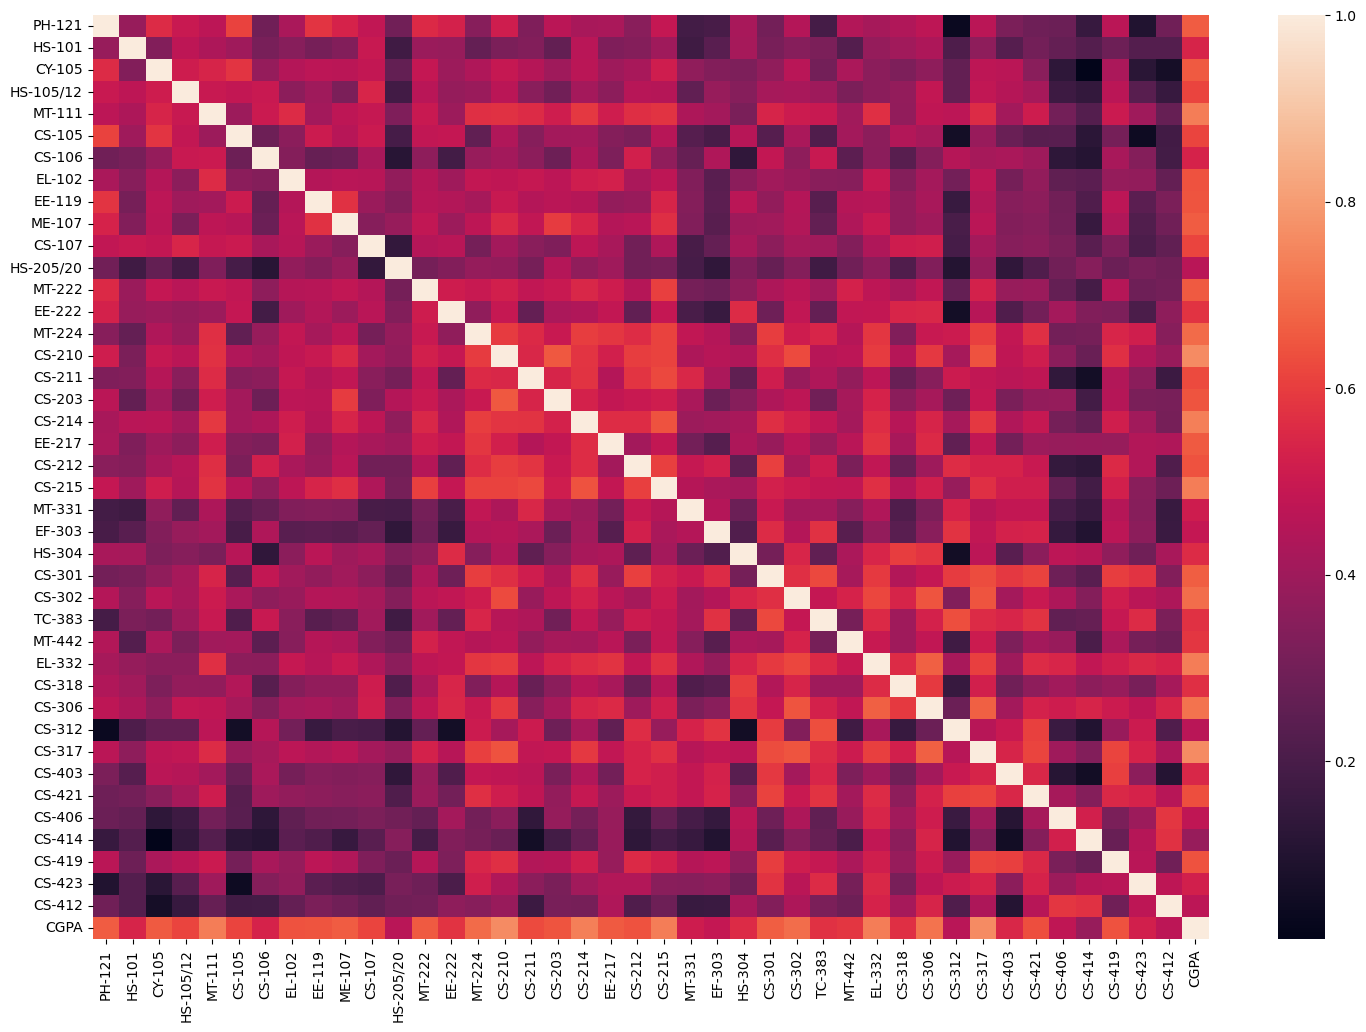

In [52]:
df_coef = df1.corr().abs()
plt.figure(figsize=(18,12))
sns.heatmap(df_coef)
plt.show()

In [89]:
cor = df2.corr()
cor

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.525831   0.498561  0.468968  0.579888   
HS-101     0.382436  1.000000  0.310681   0.473132  0.432742  0.370087   
CY-105     0.525831  0.310681  1.000000   0.491230  0.516259  0.538913   
HS-105/12  0.498561  0.473132  0.491230   1.000000  0.494731  0.488107   
MT-111     0.468968  0.432742  0.516259   0.494731  1.000000  0.384408   
CS-105     0.579888  0.370087  0.538913   0.488107  0.384408  1.000000   
CS-106     0.310055  0.312104  0.353041   0.486794  0.487954  0.309423   
EL-102     0.423942  0.349412  0.398521   0.360304  0.555895  0.323776   
EE-119     0.579964  0.309697  0.459942   0.400303  0.409161  0.475904   
ME-107     0.533558  0.336545  0.465840   0.320137  0.471685  0.436406   
CS-107     0.477761  0.495906  0.434401   0.540405  0.488977  0.494777   
HS-205/20  0.276588  0.180443  0.189412   0.162902  0.323900  0.154188   
MT-222     0.551805  0.391699  0.481799   0.459571  0.499415  0.474003   
EE-222     0.503473  0.375447  0.332447   0.375780  0.382793  0.461374   
MT-224     0.348024  0.265585  0.450412   0.392068  0.567848  0.258996   
CS-210     0.510259  0.330108  0.505234   0.466914  0.563606  0.448864   
CS-211     0.329882  0.335788  0.483864   0.352640  0.556099  0.357551   
CS-203     0.462853  0.263205  0.394765   0.295711  0.512505  0.410981   
CS-214     0.421076  0.461156  0.450079   0.413251  0.587102  0.399031   
EE-217     0.392447  0.326112  0.329149   0.327278  0.491106  0.313558   
CS-212     0.351823  0.340568  0.450727   0.455820  0.565169  0.329241   
CS-215     0.486069  0.401812  0.531850   0.453450  0.577513  0.451427   
MT-331     0.180330  0.181088  0.422835   0.267146  0.430279  0.237334   
EF-303     0.196272  0.240540  0.385621   0.384338  0.410918  0.198088   
HS-304     0.420629  0.418026  0.306353   0.345015  0.315129  0.433062   
CS-301     0.300945  0.313397  0.411551   0.415815  0.538492  0.237806   
CS-302     0.442185  0.358727  0.478598   0.423722  0.512888  0.414293   
TC-383     0.189226  0.320385  0.329668   0.397499  0.493420  0.233087   
MT-442     0.412442  0.208664  0.413957   0.292046  0.402934  0.407464   
EL-332     0.419078  0.378717  0.346566   0.354519  0.567875  0.356597   
CS-318     0.441321  0.404702  0.308356   0.373775  0.370270  0.432502   
CS-306     0.472384  0.432533  0.330342   0.484828  0.474400  0.422468   
CS-312     0.038184  0.213380  0.311778   0.263143  0.467946  0.075646   
CS-317     0.464022  0.364250  0.481694   0.478816  0.555098  0.381722   
CS-403     0.295339  0.220367  0.488062   0.430615  0.402362  0.285865   
CS-421     0.290351  0.301934  0.388553   0.415946  0.511463  0.232251   
CS-406     0.299112  0.260644  0.106782   0.160855  0.311991  0.235715   
CS-414     0.120027  0.196429 -0.041840   0.139576  0.224814  0.069217   
CS-419     0.462770  0.284668  0.458282   0.465352  0.502473  0.318130   
CS-423     0.094921  0.228103  0.133107   0.235029  0.400679  0.041015   
CS-412     0.337059  0.227334  0.097503   0.174749  0.288612  0.201005   
CGPA      -0.663135 -0.537170 -0.623652  -0.613989 -0.730095 -0.581277   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.310055  0.423942  0.579964  0.533558  ...  0.038184  0.464022   
HS-101     0.312104  0.349412  0.309697  0.336545  ...  0.213380  0.364250   
CY-105     0.353041  0.398521  0.459942  0.465840  ...  0.311778  0.481694   
HS-105/12  0.486794  0.360304  0.400303  0.320137  ...  0.263143  0.478816   
MT-111     0.487954  0.555895  0.409161  0.471685  ...  0.467946  0.555098   
CS-105     0.309423  0.323776  0.475904  0.436406  ...  0.075646  0.381722   
CS-106     1.000000  0.331438  0.287646  0.303498  ...  0.423516  0.419458   
EL-102     0.331438  1.000000  0.448908  0.461690  ...  0.301324  0.466556   
EE-119     0.287646  0.448908  1.000000  0.572964  ...  0.156809  0.445496   
ME-107     0.303498  0.461690  0.572964  1.000000 

In [92]:
# with heat map and .corr() method i did not observe any multicollinearity Issue present in the data set

In [91]:

correlation_matrix = df2.corr()

CGPA_correlation = correlation_matrix['CGPA']
    
print(CGPA_correlation)


PH-121      -0.663135
HS-101      -0.537170
CY-105      -0.623652
HS-105/12   -0.613989
MT-111      -0.730095
CS-105      -0.581277
CS-106      -0.530403
EL-102      -0.642262
EE-119      -0.646829
ME-107      -0.663023
CS-107      -0.615309
HS-205/20   -0.447161
MT-222      -0.656320
EE-222      -0.547007
MT-224      -0.692696
CS-210      -0.755957
CS-211      -0.628070
CS-203      -0.644191
CS-214      -0.733848
EE-217      -0.643131
CS-212      -0.642878
CS-215      -0.730460
MT-331      -0.487330
EF-303      -0.485478
HS-304      -0.557912
CS-301      -0.664117
CS-302      -0.694921
TC-383      -0.572329
MT-442      -0.559424
EL-332      -0.729609
CS-318      -0.566393
CS-306      -0.708299
CS-312      -0.458019
CS-317      -0.760792
CS-403      -0.514134
CS-421      -0.633001
CS-406      -0.475525
CS-414      -0.355339
CS-419      -0.641804
CS-423      -0.520968
CS-412      -0.489052
CGPA         1.000000
Name: CGPA, dtype: float64


In [93]:
# here i observed many of the features have Medium range of correlation with the label

In [102]:
df2.shape

(571, 42)

In [94]:
# let's separate features and label
x = df2.drop(['CGPA'],axis=1)
y = df2['CGPA']
x.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [95]:
# let's scale the data 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.418591   0.549869  1.374222  1.838873  1.587946   
1   -1.242052  1.411559  1.676105   1.488043  0.369509  1.156812  1.587946   
2   -1.242052 -0.744483 -1.274197   0.237145  0.034605 -1.368972  0.444804   
3    1.714365  0.692879  1.676105   1.488043  1.709126 -0.020426  1.834074   
4   -0.585070 -1.103823  0.043625  -0.075580 -1.305012 -1.368972 -0.719166   
..        ...       ...       ...        ...       ...       ...       ...   
566 -0.256579 -1.822504 -1.274197  -0.701029 -0.970108 -1.368972 -0.719166   
567 -0.913561 -1.822504 -1.274197  -1.326478 -1.305012 -1.368972 -1.927057   
568 -0.256579 -1.822504  0.043625  -0.075580 -1.305012 -1.368972 -1.927057   
569 -1.242052 -0.385142  1.553548  -1.326478  1.709126  1.838873  0.444804   
570  0.728893  1.411559  1.553548   0.549869  0.704413  1.838873 -0.282588   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0    1.333963  0.419492  1.024565  ...  0.663660  1.169315  1.155824   
1   -1.307365  2.302589  1.342687  ...  1.715324  1.764660  1.521056   
2    0.013299 -0.710366 -0.884168  ... -0.738559 -0.319046 -0.670339   
3    1.333963  1.925970  0.706443  ...  1.364769  1.764660  0.425358   
4    0.013299 -1.463605 -0.884168  ... -0.738559  0.276298 -0.305107   
..        ...       ...       ...  ...       ...       ...       ...   
566 -0.647033 -1.086986 -0.247924  ... -0.037450 -0.616719 -1.035572   
567 -0.647033 -1.463605 -1.520412  ... -0.738559 -0.021374 -0.305107   
568 -1.307365 -1.463605 -0.566046  ... -0.037450 -0.616719 -0.670339   
569  1.333963  0.419492  1.024565  ... -0.037450  1.466987 -0.670339   
570  1.003797  0.796111  1.660810  ...  2.065879  0.871643  0.425358   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.338551  0.958939 -0.222957 -1.255692  1.740513 -0.346121 -0.305331  
1    0.924323  1.325686 -0.222957  1.112272  0.900418  0.727983  0.180073  
2   -1.403222  0.225444 -1.824320 -1.255692 -1.619869 -0.704156 -1.830580  
3    1.692872  0.958939  0.958557  0.569191  1.320466  1.086017  1.528155  
4    0.417176 -0.141304 -0.222957 -1.255692 -0.779774 -0.704156 -1.830580  
..        ...       ...       ...       ...       ...       ...       ...  
566 -1.403222 -1.975041 -1.824320  0.867541  0.060322 -0.346121 -1.830580  
567 -1.403222 -1.975041 -0.222957  0.569191 -0.779774  0.727983 -0.305331  
568 -1.403222 -0.508051 -1.824320  1.319864  0.060322 -0.704156 -0.305331  
569  0.108427  0.958939  1.926184  1.319864 -0.359726  0.369948  1.247191  
570  0.685513  1.325686  2.293125  1.659639  0.060322  1.802087  1.785076  

[571 rows x 41 columns]

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['VIF features'] = x.columns
vif

VIF values VIF features
0     2.786482       PH-121
1     1.761998       HS-101
2     2.488985       CY-105
3     2.298345    HS-105/12
4     2.605515       MT-111
5     2.237306       CS-105
6     1.843485       CS-106
7     1.964595       EL-102
8     2.177849       EE-119
9     2.316278       ME-107
10    2.335512       CS-107
11    1.653218    HS-205/20
12    2.291593       MT-222
13    2.093605       EE-222
14    2.788331       MT-224
15    3.142124       CS-210
16    2.680981       CS-211
17    2.590248       CS-203
18    2.706629       CS-214
19    2.355169       EE-217
20    2.730612       CS-212
21    3.035875       CS-215
22    2.092920       MT-331
23    2.124801       EF-303
24    2.502066       HS-304
25    3.075316       CS-301
26    2.739112       CS-302
27    2.891022       TC-383
28    1.856249       MT-442
29    3.207426       EL-332
30    2.378114       CS-318
31    3.427069       CS-306
32    3.221474       CS-312
33    3.155335       CS-317
34    2.431085       CS-403
35    2.718984       CS-421
36    1.898914       CS-406
37    2.110918       CS-414
38    2.549419       CS-419
39    2.590188       CS-423
40    2.130378       CS-412

In [97]:
# non of the column has higher vif score i will keep all the features for model building

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=41)

In [100]:
y_train

Seat No.
CS-97370    2.512
CS-97186    3.585
CS-97126    2.928
CS-97313    3.167
CS-97266    2.925
            ...  
CS-97470    3.714
CS-97408    2.779
CS-97244    3.593
CS-97322    3.330
CS-97081    2.815
Name: CGPA, Length: 428, dtype: float64

In [101]:
x_train

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
369  2.042856 -1.103823  0.398052  -0.075580  0.704413  1.531191  0.100145   
185 -1.242052 -0.385142  0.043625  -1.326478 -0.635204 -0.020426 -0.719166   
125 -0.585070  1.770900  0.043625   1.488043 -0.970108  0.933050  1.587946   
312 -0.256579  0.333538  0.675692   0.549869 -0.635204  1.156812 -0.719166   
265 -0.585070 -1.103823  0.043625  -0.388304  0.034605 -0.020426 -0.719166   
..        ...       ...       ...        ...       ...       ...       ...   
469 -1.242052 -1.103823 -0.449268  -1.326478 -1.305012 -0.540284 -0.282588   
407  1.714365  1.411559  0.398052  -0.388304 -0.300299  1.156812 -0.282588   
243 -1.242052 -1.103823  0.043625  -1.013753 -0.635204 -1.368972 -0.719166   
321  0.400402 -0.385142  0.675692   0.549869 -0.635204  0.365086 -0.719166   
80   2.042856 -0.025802  1.418591   1.488043  1.709126  0.674018 -0.719166   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
369  1.003797  0.796111  1.660810  ... -0.388005 -1.212063  0.425358   
185  0.343465  0.419492 -0.884168  ... -1.439669 -0.616719 -1.766037   
125  0.013299 -0.710366 -0.884168  ...  1.014214  0.573971  0.425358   
312 -1.307365  0.042873  0.706443  ...  0.313105 -0.914391 -0.305107   
265 -0.647033 -0.333747  0.706443  ...  0.313105  0.276298  1.886289   
..        ...       ...       ...  ...       ...       ...       ...   
469 -0.647033  0.042873 -0.247924  ... -0.037450 -0.914391 -1.035572   
407  0.013299  1.925970  1.024565  ... -0.037450 -1.212063 -0.670339   
243  0.013299 -0.710366 -0.247924  ... -1.439669  0.276298 -0.305107   
321 -0.977199 -0.710366 -0.247924  ... -0.037450 -0.914391 -0.670339   
80   0.343465 -0.333747  0.388321  ...  0.313105  0.871643  0.790591   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
369  0.685513  0.225444 -0.222957  0.569191 -0.359726 -0.704156  0.935949  
185 -1.403222 -0.141304 -0.222957  0.186450 -0.779774 -0.704156 -0.305331  
125  0.924323  0.225444 -0.222957 -1.255692 -0.779774 -0.346121 -0.305331  
312  0.417176 -0.508051  1.492793  0.186450  1.320466 -0.704156 -0.305331  
265  0.108427  0.225444 -1.824320  0.186450  0.480370  2.160121  0.935949  
..        ...       ...       ...       ...       ...       ...       ...  
469 -1.403222 -0.508051 -1.824320  0.867541 -1.619869 -1.420225 -0.305331  
407  0.417176 -0.874799 -0.222957  0.186450 -0.359726 -1.420225  0.585164  
243 -1.403222 -0.141304 -1.824320 -1.255692  0.060322 -0.704156 -1.830580  
321  0.417176 -0.141304 -0.222957  0.186450 -0.359726 -0.704156  0.585164  
80   1.140461 -0.141304 -1.824320 -1.255692  0.060322 -0.346121 -0.305331  

[428 rows x 41 columns]

In [109]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('r2_score: ',r2_score(y_test,pred_lr))
print('r2_score on training data: ',r2_score(y_train,pred_train)*100)
print('mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('mean squared error: ',mean_squared_error(y_test,pred_lr))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score:  0.8386393417967847
r2_score on training data:  94.54864075023963
mean absolute error:  0.12165373289330383
mean squared error:  0.07075123393003614
root mean squared error:  0.26599104107100324


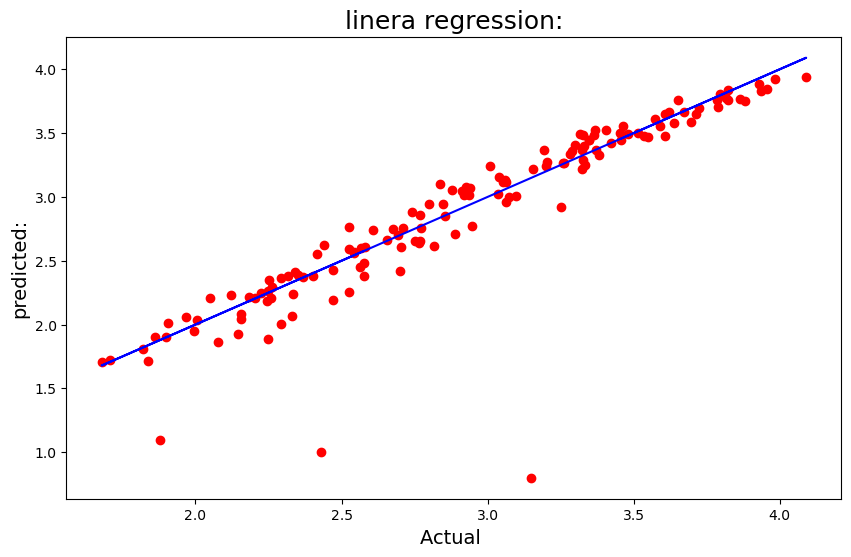

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr,y=y_test,color='r')
plt.plot(pred_lr,pred_lr,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('predicted:',fontsize=14)
plt.title('linera regression:',fontsize=18)
plt.show()

In [112]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print('r2_score: ',r2_score(y_test,pred_rfr))
print('r2_score on training data: ',r2_score(y_train,pred_train)*100)
print('mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

r2_score:  0.8655241737052322
r2_score on training data:  98.84954951475423
mean absolute error:  0.13247902097902092
mean squared error:  0.05896313729790204
root mean squared error:  0.24282326350228892


In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('r2_score: ',r2_score(y_test,pred_knn))
print('r2_score on training data: ',r2_score(y_train,pred_train)*100)
print('mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('mean squared error: ',mean_squared_error(y_test,pred_knn))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score:  0.8214199422774795
r2_score on training data:  94.74140604894775
mean absolute error:  0.12037482517482517
mean squared error:  0.0783013627972028
root mean squared error:  0.2798238067020081


In [115]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
pred_train = dt.predict(x_train)
print('r2_score: ',r2_score(y_test,pred_dt))
print('r2_score on training data: ',r2_score(y_train,pred_train)*100)
print('mean absolute error: ',mean_absolute_error(y_test,pred_dt))
print('mean squared error: ',mean_squared_error(y_test,pred_dt))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dt)))

r2_score:  0.73223388864858
r2_score on training data:  100.0
mean absolute error:  0.2158251748251748
mean squared error:  0.11740645454545452
root mean squared error:  0.34264625278186617


In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
score = cross_val_score (lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross val score - ',(r2_score(y_test,pred_lr)-score.mean())*100)

[0.88745168 0.92459336 0.89000264 0.93320388 0.82748933]
0.8925481786915961
Difference between r2 and cross val score -  -5.390883689481141


In [118]:
score1 = cross_val_score (rfr,x,y)
print(score)
print(score.mean())
print('Difference between r2 and cross val score - ',(r2_score(y_test,pred_rfr)-score.mean())*100)

[0.88745168 0.92459336 0.89000264 0.93320388 0.82748933]
0.8925481786915961
Difference between r2 and cross val score -  -2.7024004986363925


In [119]:
score2 = cross_val_score (knn,x,y)
print(score)
print(score.mean())
print('Difference between r2 and cross val score - ',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.88745168 0.92459336 0.89000264 0.93320388 0.82748933]
0.8925481786915961
Difference between r2 and cross val score -  -7.112823641411659


In [120]:
score3 = cross_val_score (dt,x,y)
print(score)
print(score.mean())
print('Difference between r2 and cross val score - ',(r2_score(y_test,pred_dt)-score.mean())*100)

[0.88745168 0.92459336 0.89000264 0.93320388 0.82748933]
0.8925481786915961
Difference between r2 and cross val score -  -16.03142900430161


In [122]:
# here i observed my all models  performing worst on this data hence i dont understand how to proceed further 